In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


 ### Imports

In [1]:
import numpy as np
from math import sqrt, log, atan2, cos, sin, pi
from sympy import init_printing, classify_ode, dsolve, solve, latex
from sympy import Function, Rational, dsolve, Eq, Derivative, symbols
from sympy.plotting import plot
from sympy.utilities.lambdify import lambdify
from IPython.display import display, display_latex, Markdown
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
from warnings import filterwarnings

init_printing(use_latex="mathjax")
filterwarnings("ignore")
get_ipython().run_line_magic("matplotlib", "inline")


 ### Constants

In [2]:
FIGURE_SIZE = (12, 9)
DPI = 200
ARG_RANGE = (-5, 5)
NUM_STEPS = 10
FINE_STEPS = 1000 * NUM_STEPS
RANGE = np.linspace(*ARG_RANGE, NUM_STEPS)
FINE_RANGE = np.linspace(*ARG_RANGE, 10 * NUM_STEPS)
POS_RANGE = np.linspace(0, ARG_RANGE[-1], FINE_STEPS)


 ### Utilities

In [3]:
def center_axes(fig):
    ax = fig.add_subplot(1, 1, 1)

    ax.spines["left"].set_position("center")
    ax.spines["bottom"].set_position("center")

    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")

    ax.xaxis.set_ticks_position("bottom")
    ax.yaxis.set_ticks_position("left")


def draw_the_vector_field(
    x_gradient,
    y_gradient,
    x_range,
    y_range,
    width=0.01,
    normalised=False,
    scale=1,
    centered_axes=True,
    figure_size=FIGURE_SIZE,
    dpi=DPI,
    color="#b5c7e5",
):
    X, Y = np.meshgrid(x_range, y_range)
    DX, DY = np.meshgrid(np.zeros(len(x_range)), np.zeros(len(y_range)))
    for x_idx, x_val in enumerate(x_range):
        for y_idx, y_val in enumerate(y_range):
            dx = x_gradient(x_val, y_val)
            dy = y_gradient(x_val, y_val)
            if normalised:
                norm = sqrt(dx ** 2 + dy ** 2)
                dx /= norm
                dy /= norm
            DX[y_idx][x_idx] = dx
            DY[y_idx][x_idx] = dy

    fig = plt.figure(figsize=figure_size, dpi=dpi)
    if centered_axes:
        center_axes(fig)

    plt.quiver(
        X,
        Y,
        DX,
        DY,
        angles="xy",
        color=color,
        edgecolors=("k",),
        units="x",
        width=width,
    )


def draw_the_graph(
    x_range,
    y_range,
    width=5,
    color="#ff5700",
    centered_axes=True,
    figure_size=FIGURE_SIZE,
    dpi=DPI,
):
    fig = plt.figure(figsize=figure_size, dpi=dpi)
    if centered_axes:
        center_axes(fig)
    return plt.plot(x_range, y_range, linewidth=4, color=color)



In [4]:
RANGE = np.linspace(-2, 2, 5)

 # Problem 1
 ## a

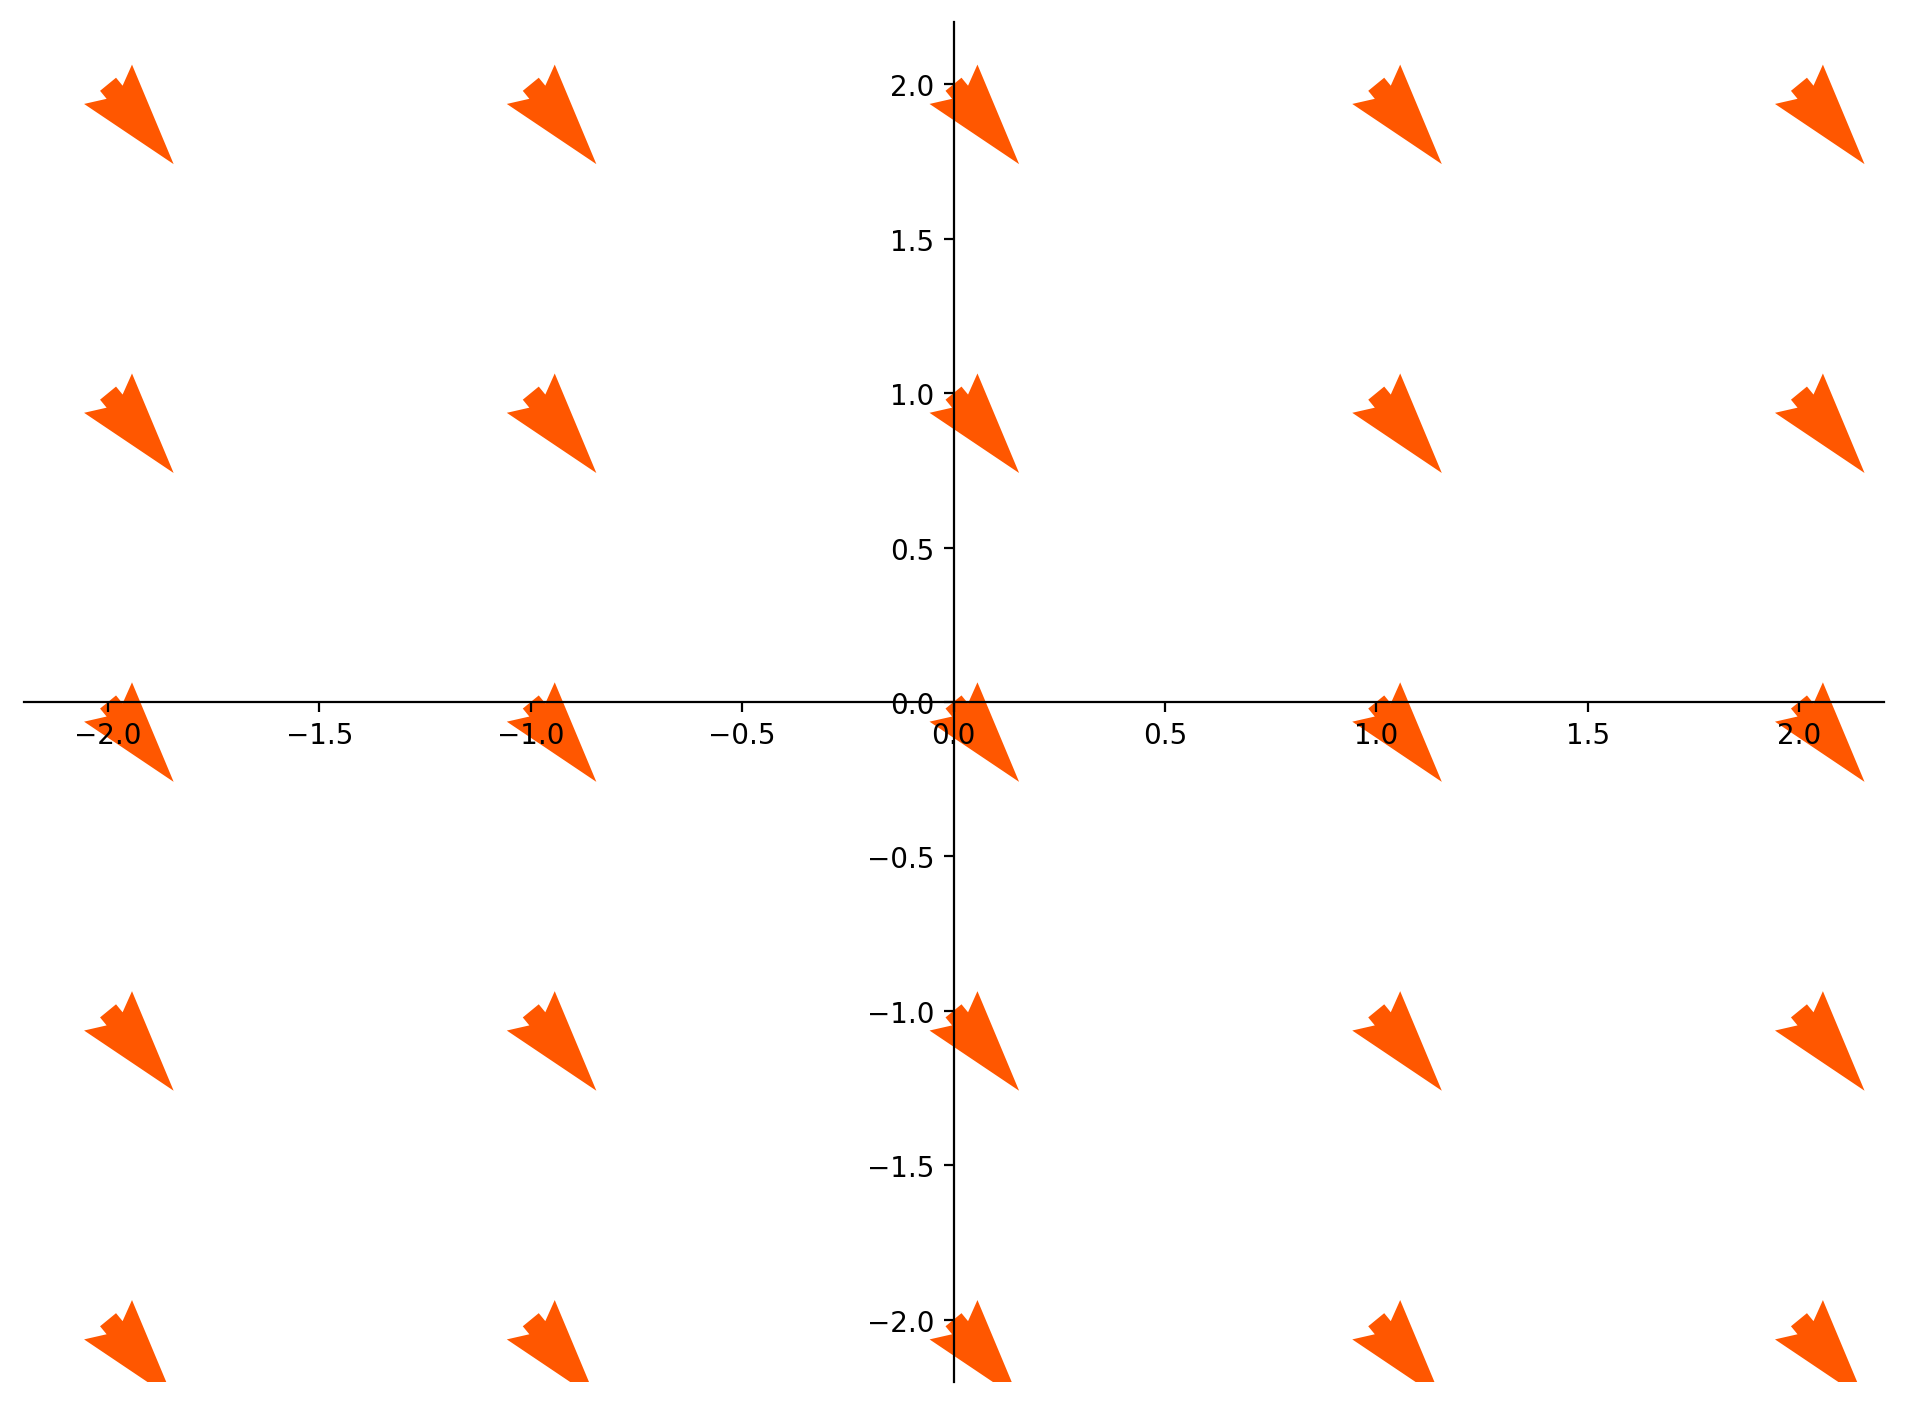

In [5]:
draw_the_vector_field(
    lambda x, y: 1, lambda x, y: -5 / 3, RANGE, RANGE, color="#ff5700", width=0.2
)


 ## b

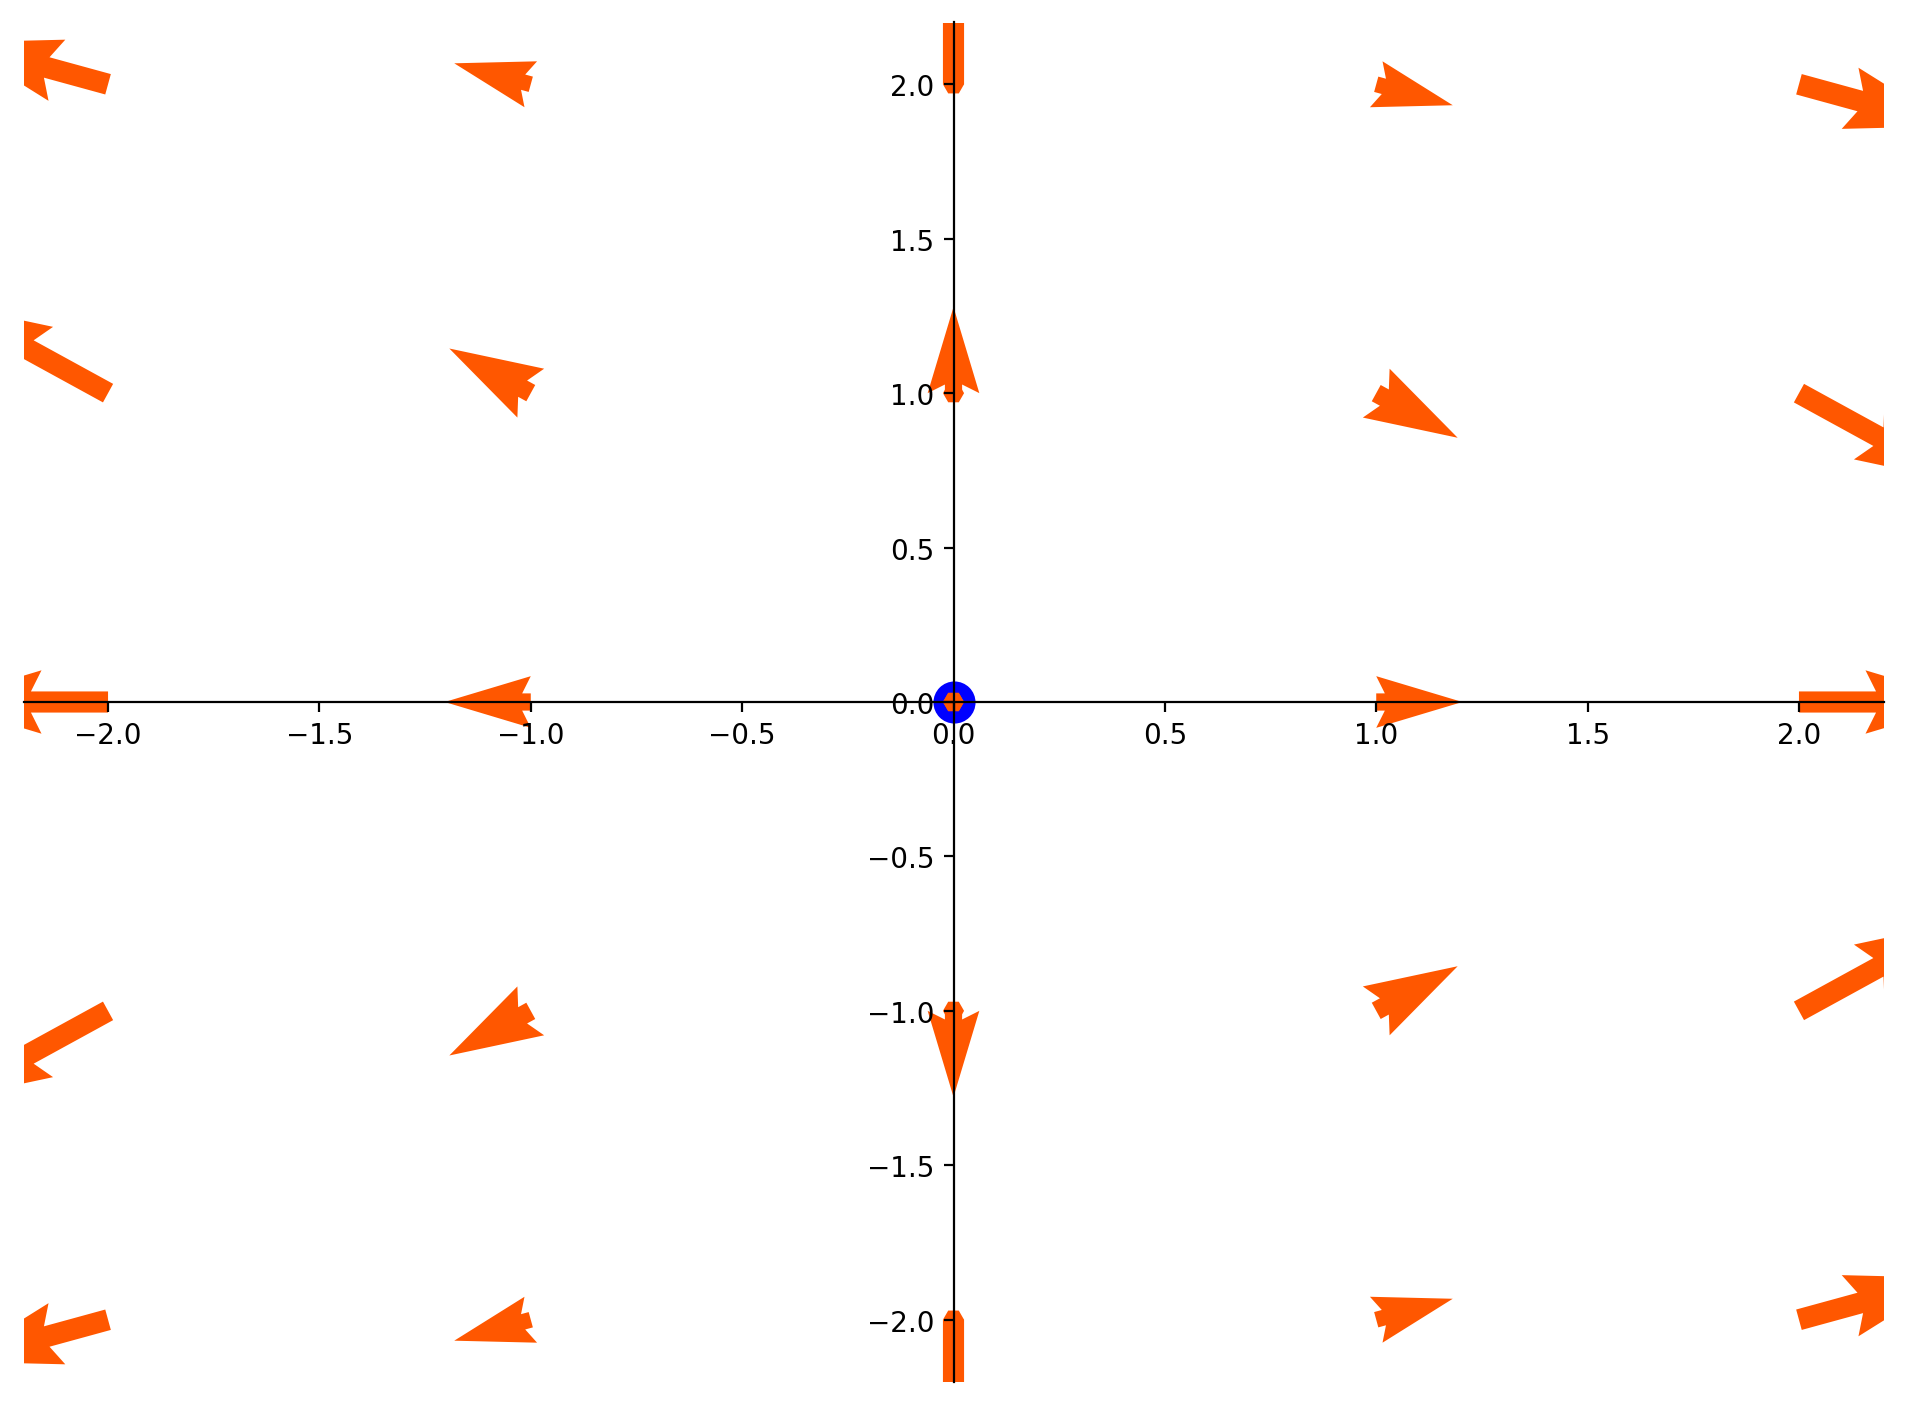

In [6]:
draw_the_vector_field(
    lambda x, y: x,
    lambda x, y: -3 * x / (4 * y),
    RANGE,
    RANGE,
    color="#ff5700",
    width=0.05,
)
plt.scatter(0, 0, color="b", s=200)
plt.quiver(
    RANGE,
    np.zeros(len(RANGE)),
    3 * RANGE,
    np.zeros(len(RANGE)),
    angles="xy",
    color="#ff5700",
    edgecolors=("k",),
    units="x",
    width=0.05,
)
plt.quiver(
    np.zeros(len(RANGE)),
    RANGE,
    np.zeros(len(RANGE)),
    4 * RANGE,
    angles="xy",
    color="#ff5700",
    edgecolors=("k",),
    units="x",
    width=0.05,
)


 ## c

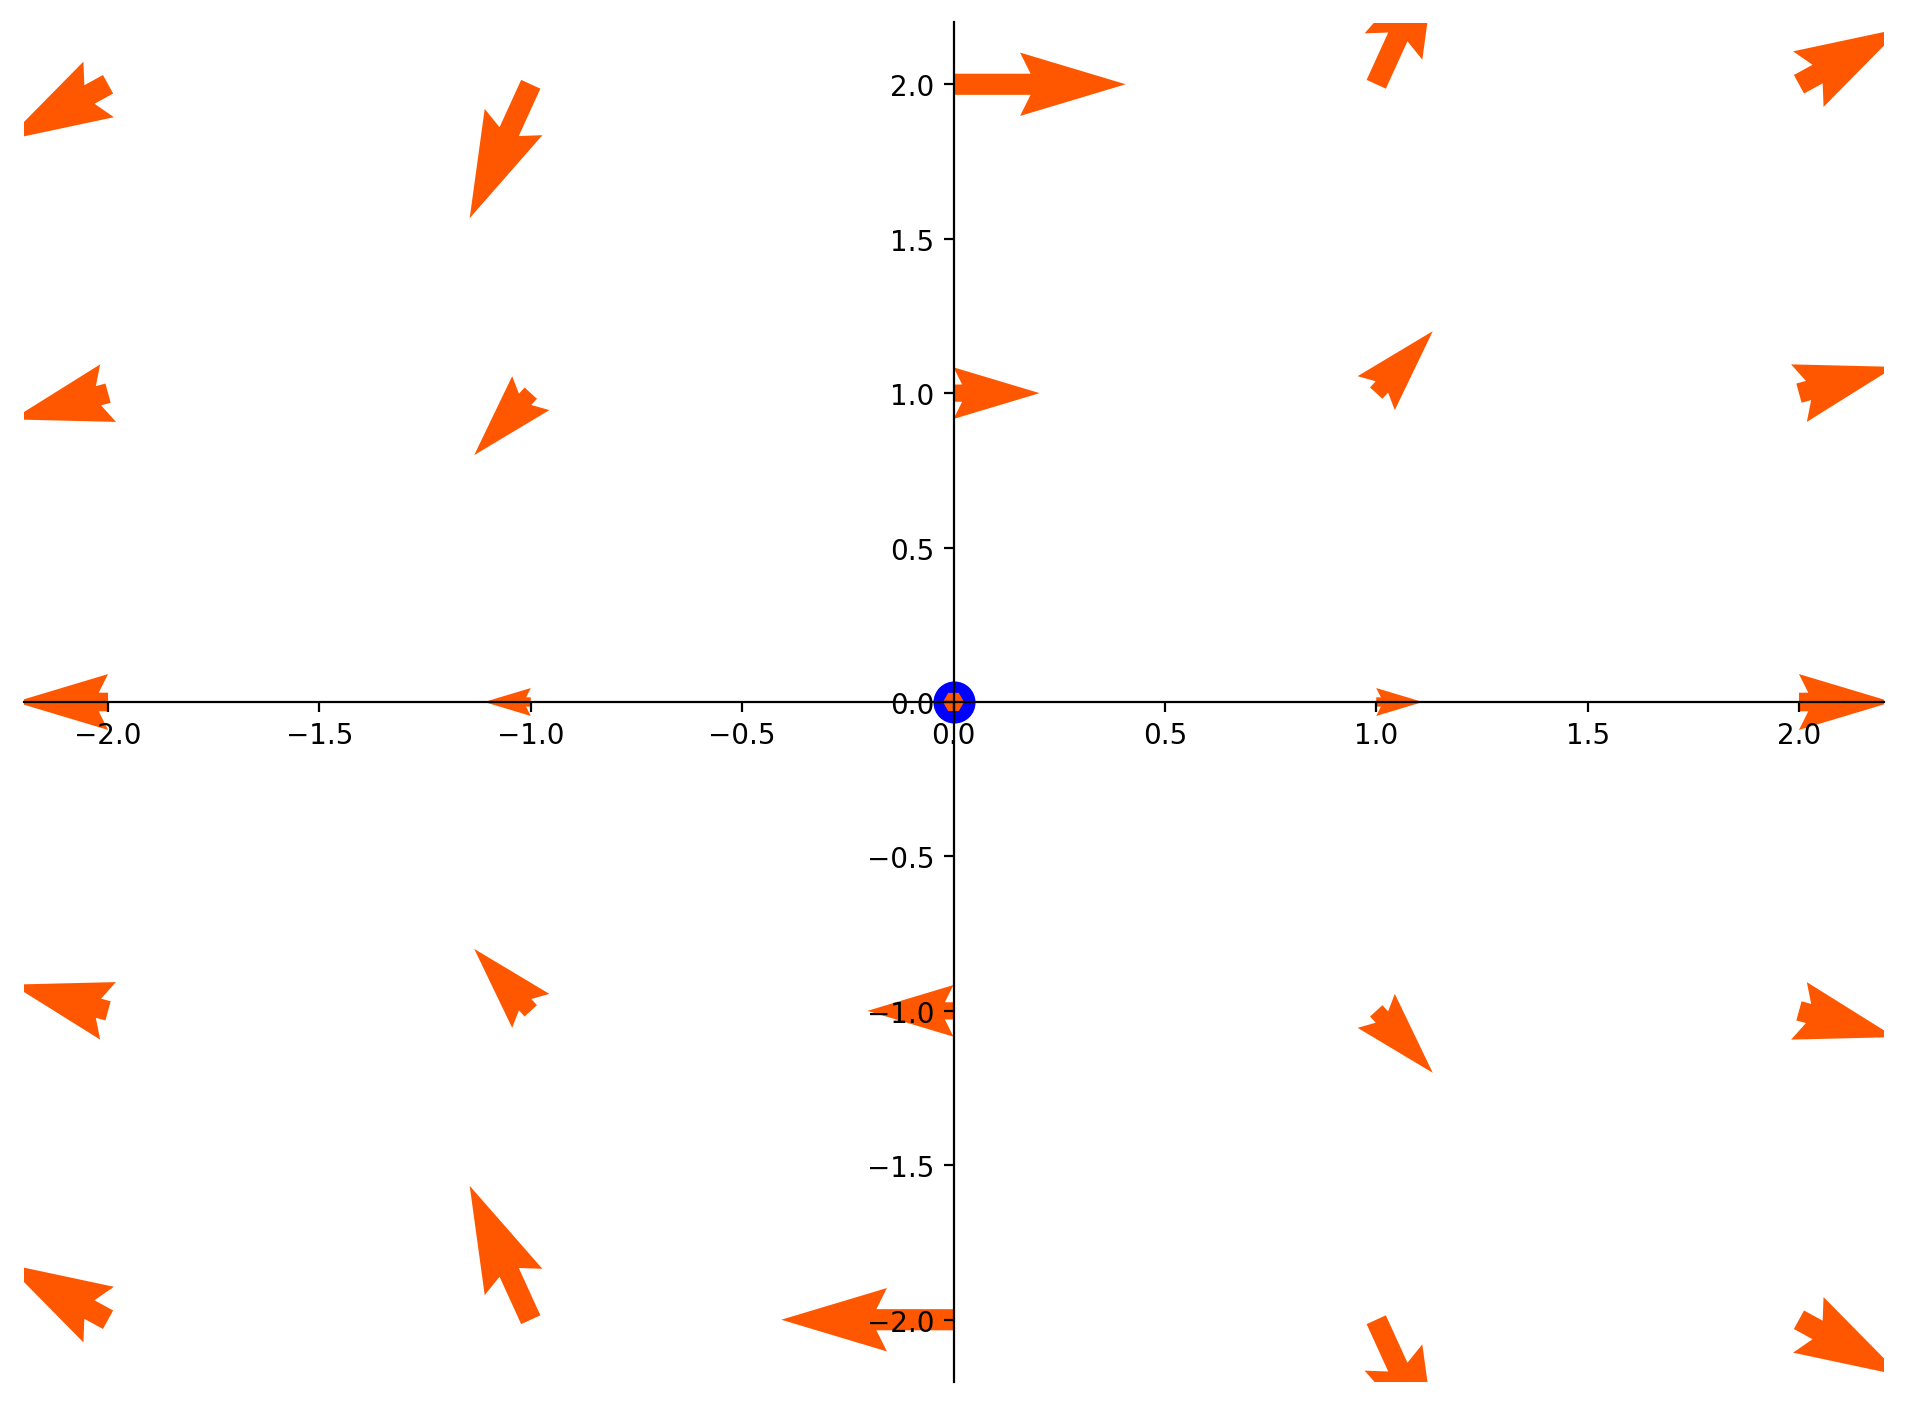

In [7]:
draw_the_vector_field(
    lambda x, y: x,
    lambda x, y: 3 * y / (2 * x),
    RANGE,
    RANGE,
    color="#ff5700",
    width=0.05,
)
plt.scatter(0, 0, color="b", s=200)
plt.quiver(
    np.zeros(len(RANGE)),
    RANGE,
    3 * RANGE,
    np.zeros(len(RANGE)),
    angles="xy",
    color="#ff5700",
    edgecolors=("k",),
    units="x",
    width=0.05,
)

 ## d

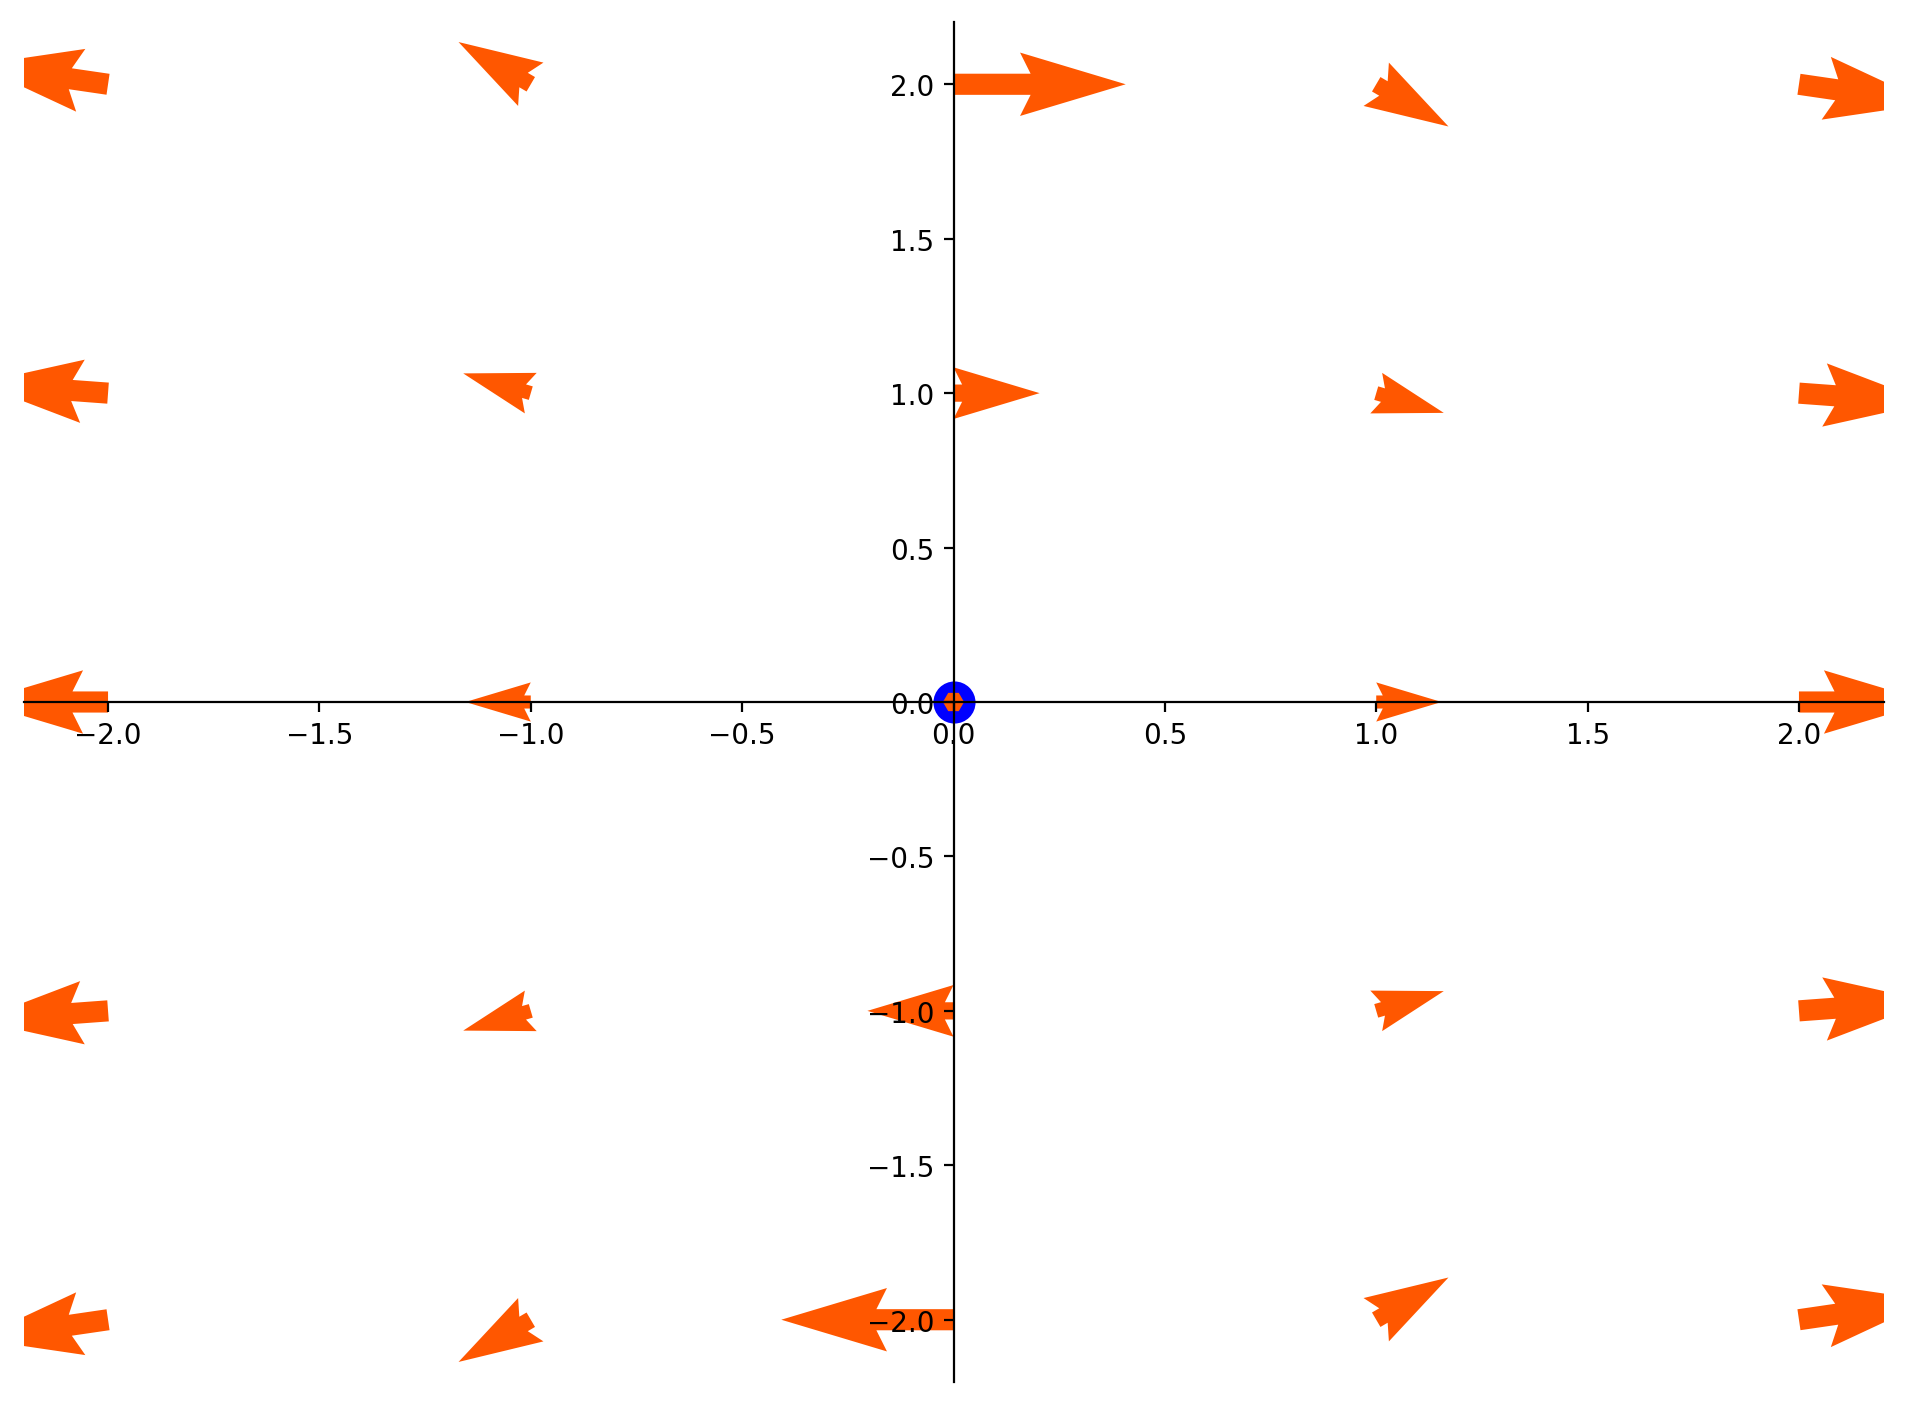

In [8]:
draw_the_vector_field(
    lambda x, y: x,
    lambda x, y: -2 * y / (5 * x),
    RANGE,
    RANGE,
    color="#ff5700",
    width=0.05,
)
plt.scatter(0, 0, color="b", s=200)
plt.quiver(
    np.zeros(len(RANGE)),
    RANGE,
    2 * RANGE,
    np.zeros(len(RANGE)),
    angles="xy",
    color="#ff5700",
    edgecolors=("k",),
    units="x",
    width=0.05,
)

 # Problem 2
 ## a

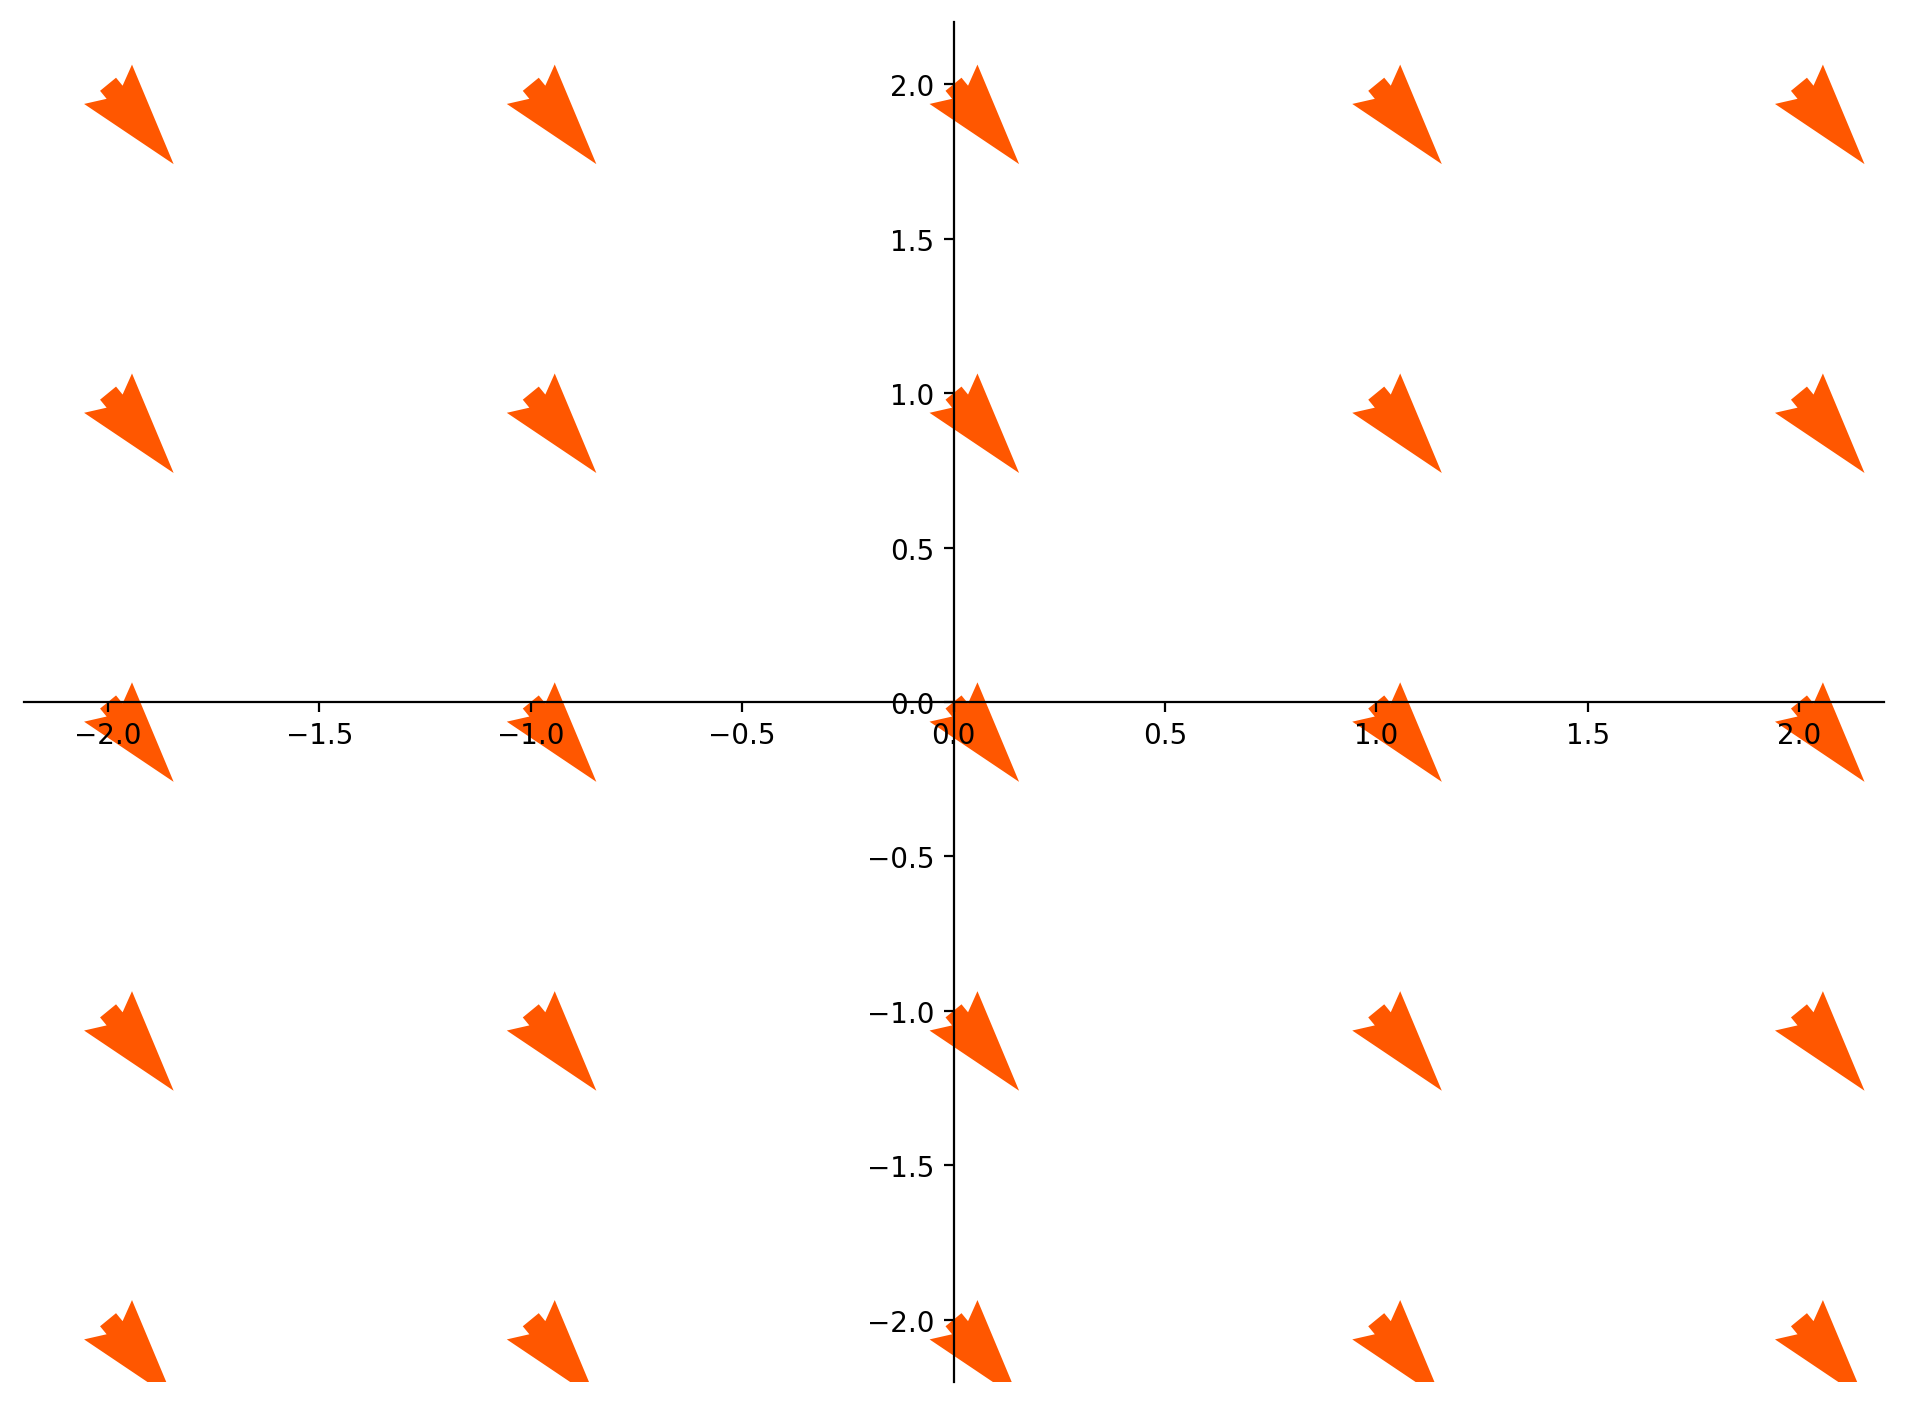

In [9]:
draw_the_vector_field(
    lambda x, y: 1, lambda x, y: -5 / 3, RANGE, RANGE, color="#ff5700", width=0.2
)

 ## b

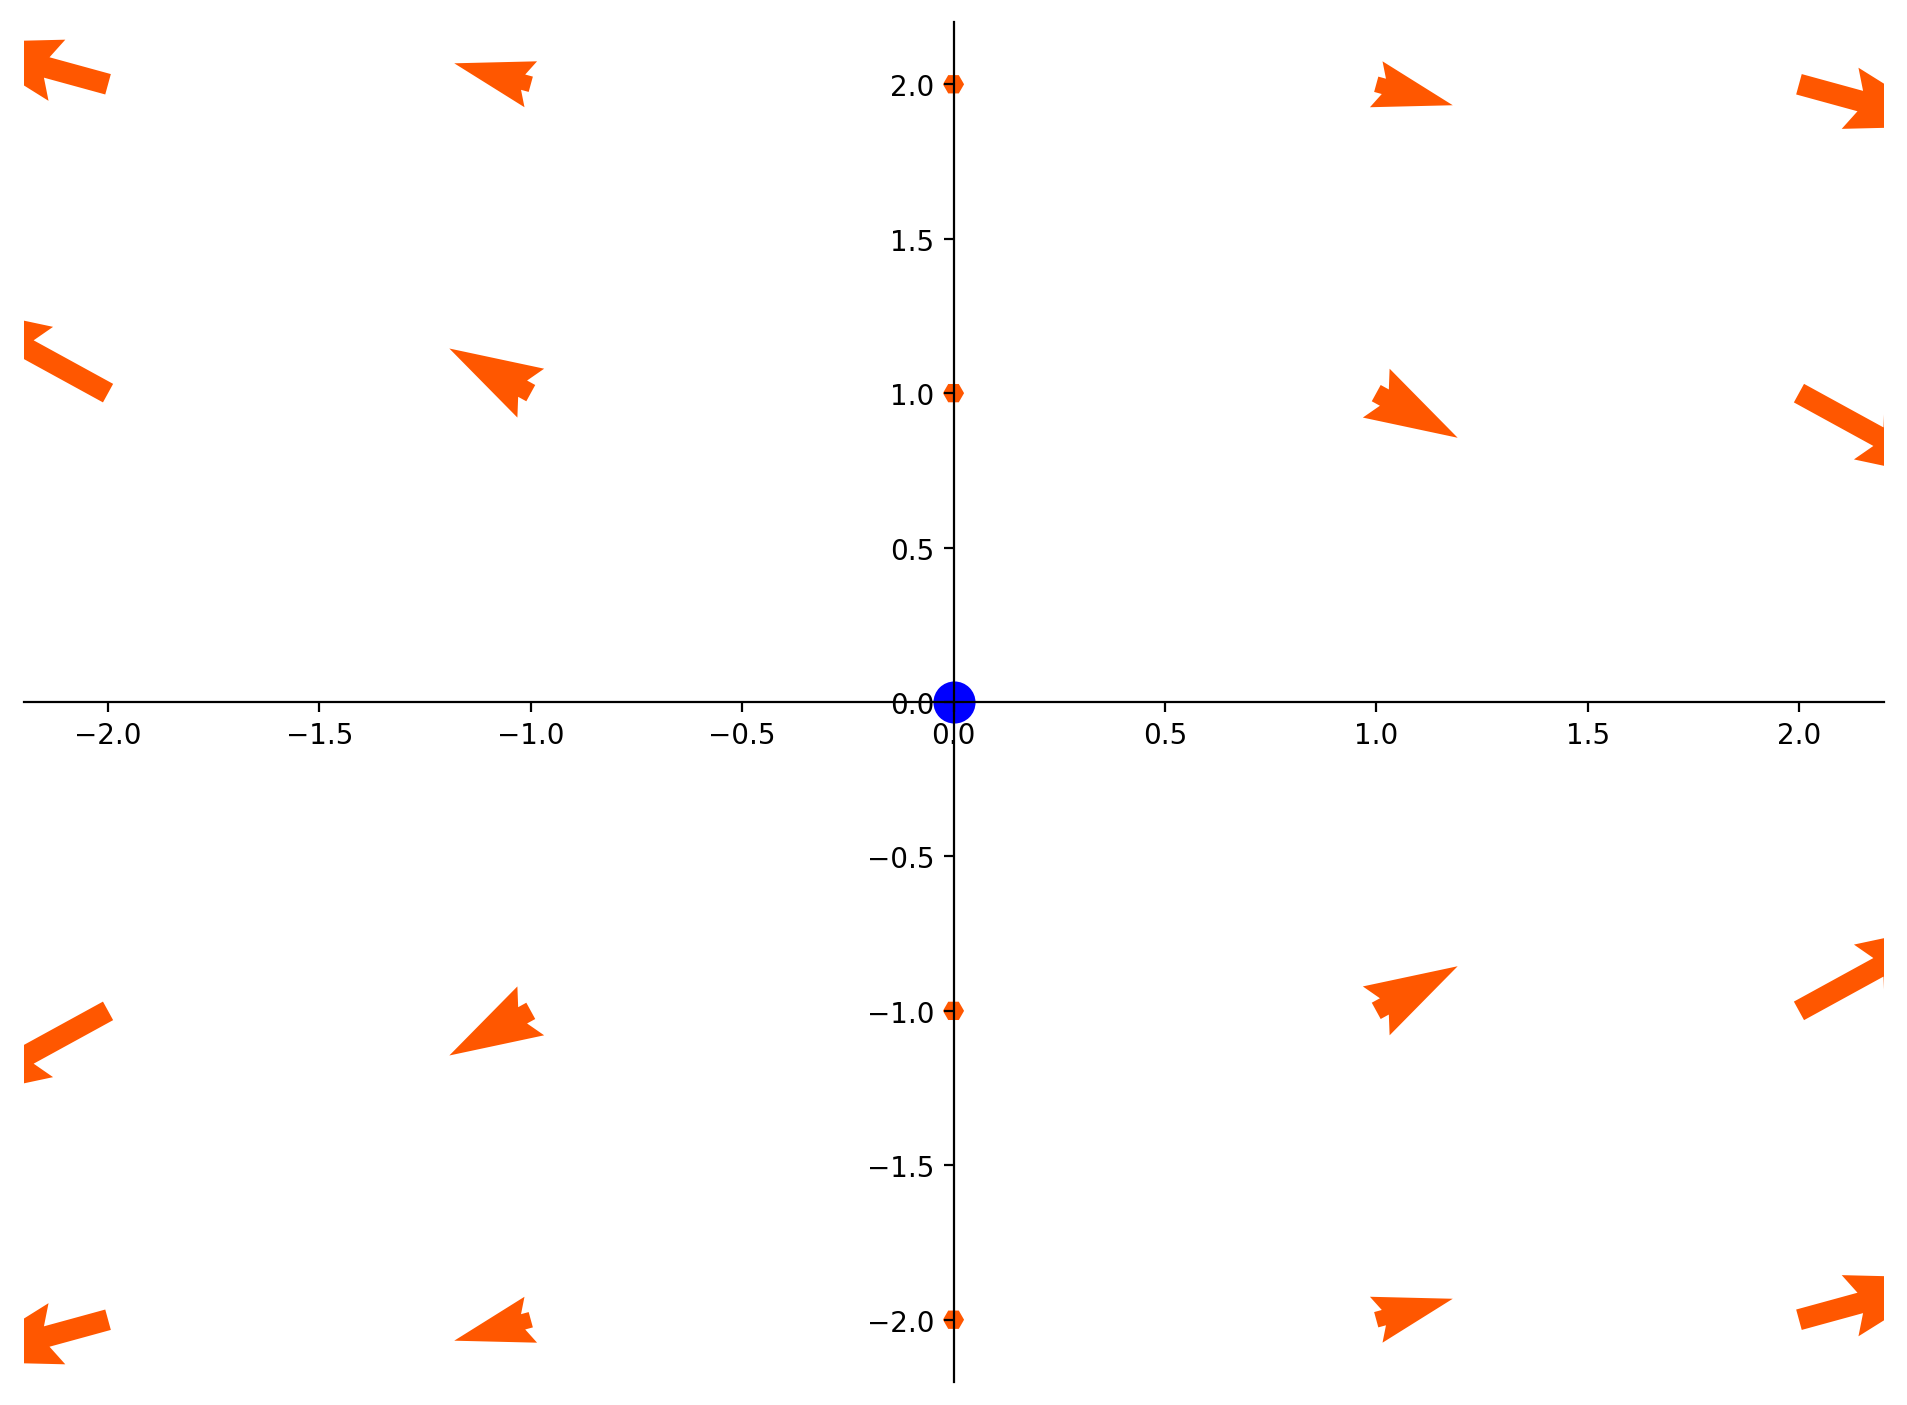

In [10]:
draw_the_vector_field(
    lambda x, y: x,
    lambda x, y: -3 * x / (4 * y),
    RANGE,
    RANGE,
    color="#ff5700",
    width=0.05,
)
plt.scatter(0, 0, color="b", s=200)

 ## c

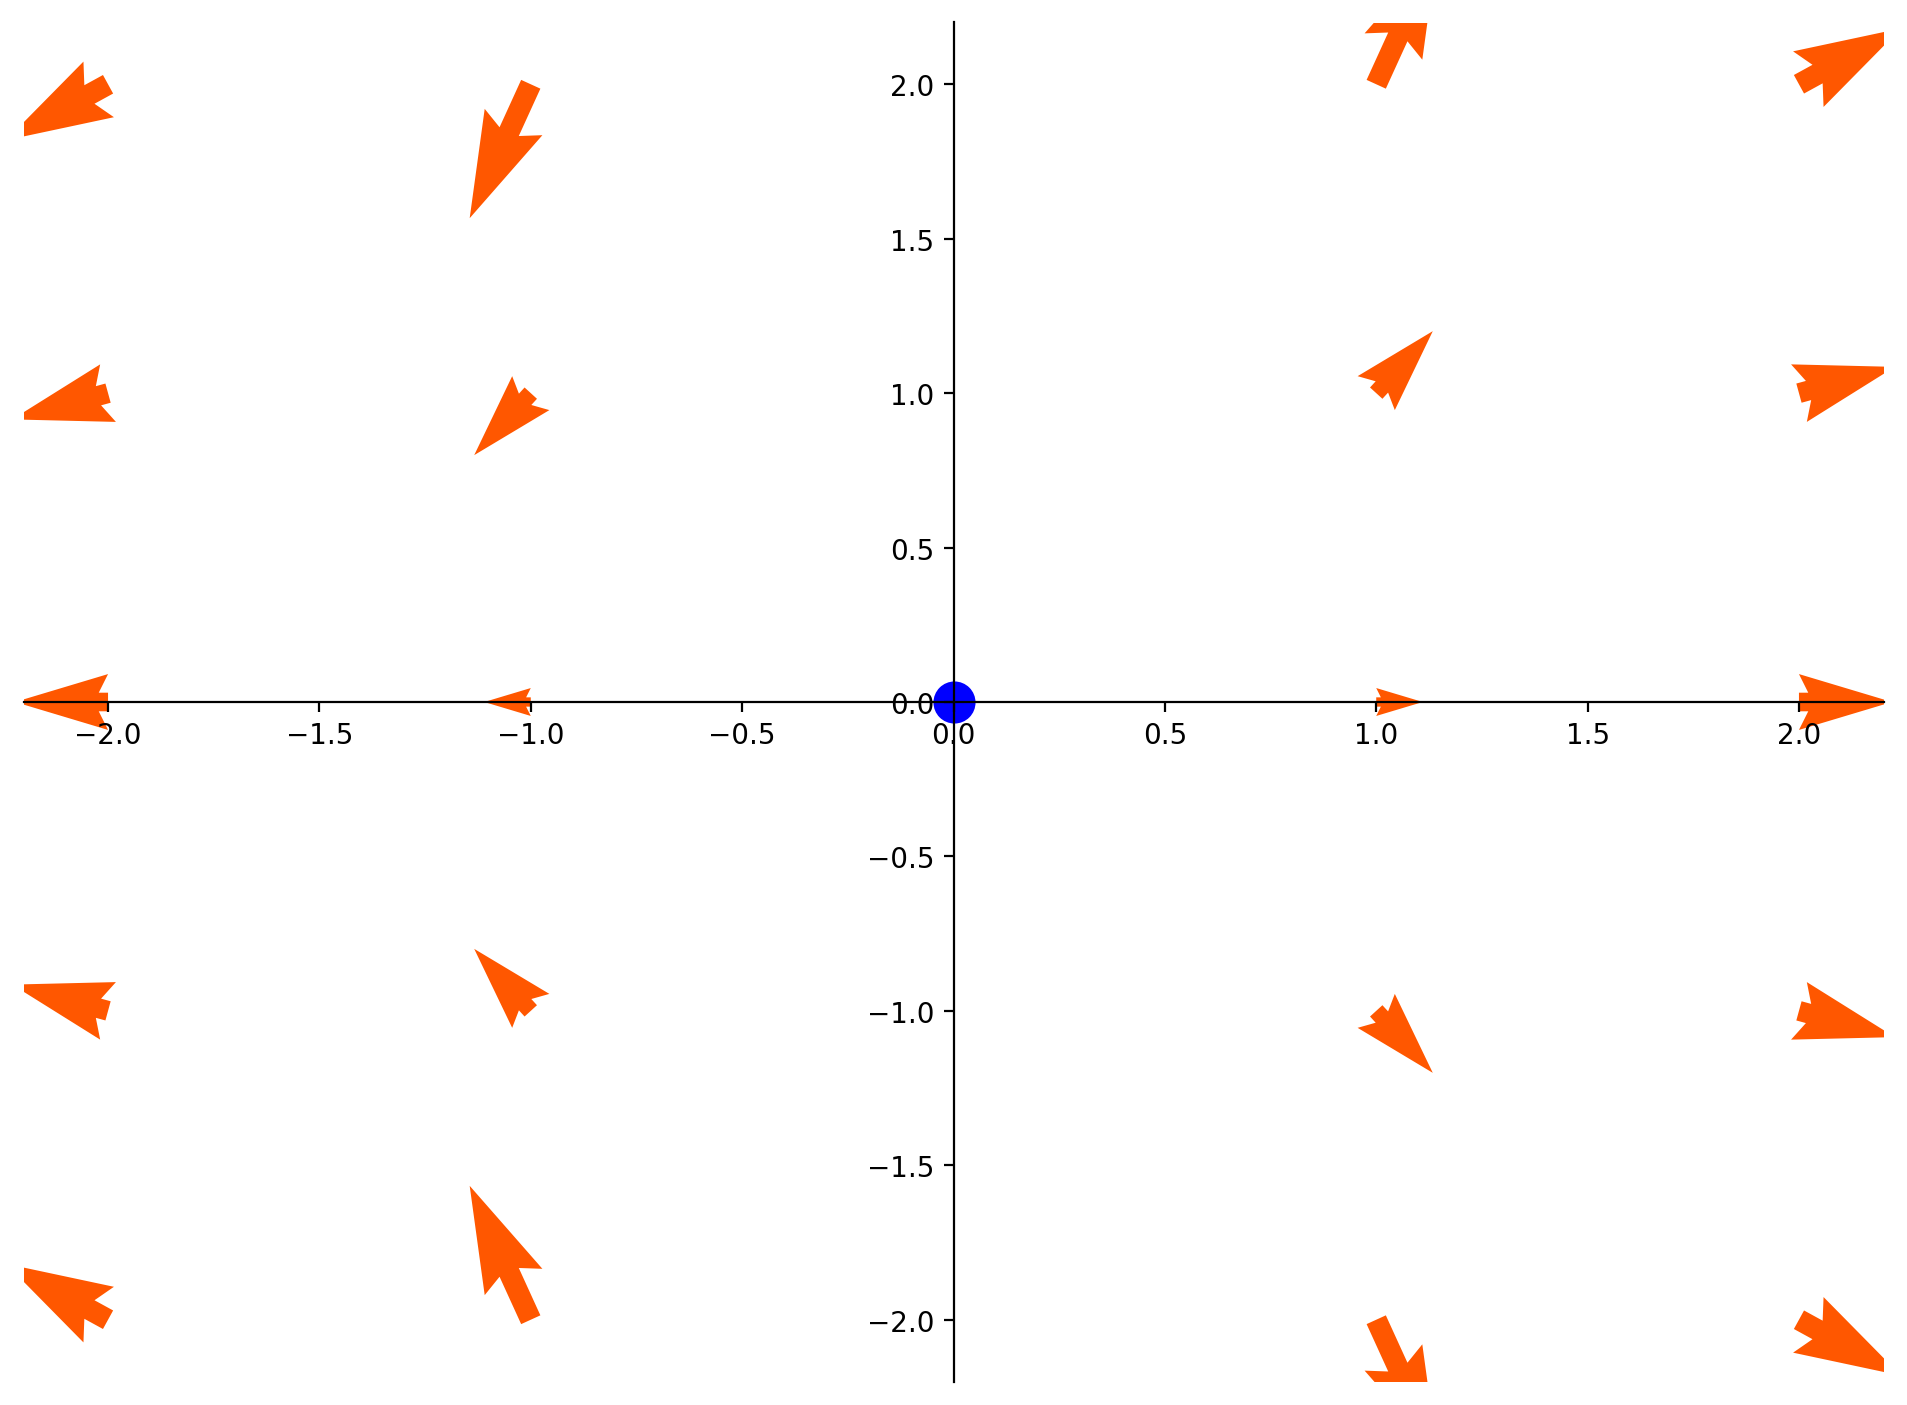

In [11]:
draw_the_vector_field(
    lambda x, y: x,
    lambda x, y: 3 * y / (2 * x),
    RANGE,
    RANGE,
    color="#ff5700",
    width=0.05,
)
plt.scatter(0, 0, color="b", s=200)

 ## d

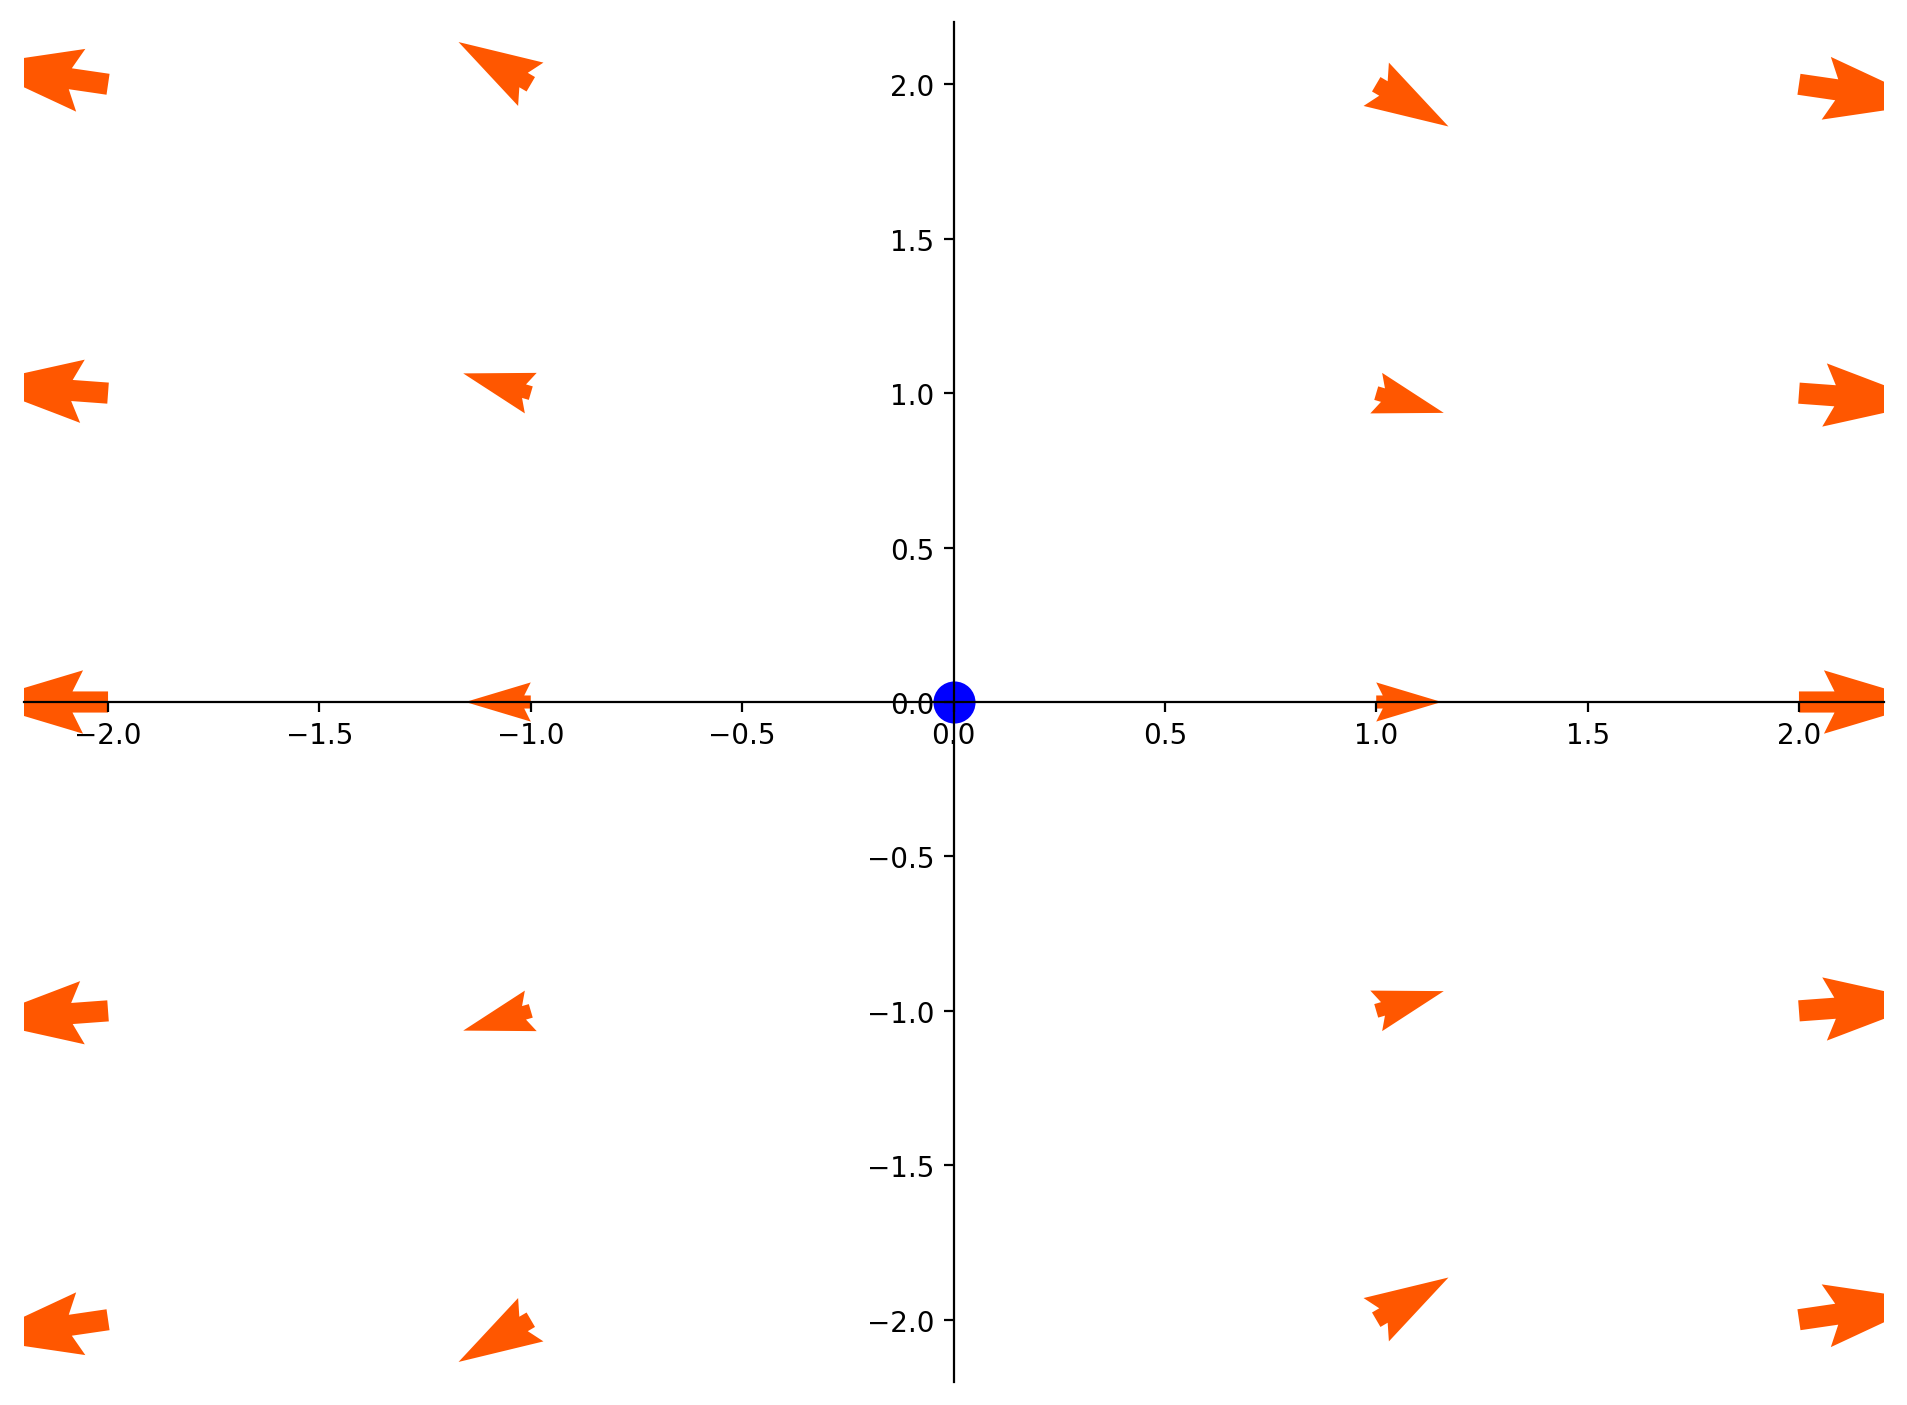

In [12]:
draw_the_vector_field(
    lambda x, y: x,
    lambda x, y: -2 * y / (5 * x),
    RANGE,
    RANGE,
    color="#ff5700",
    width=0.05,
)
plt.scatter(0, 0, color="b", s=200)

 All of the slope fields corresponding to the differential equations above coincide with the slope fields of the differential forms in problem 1, but for the cases when the denominator of the equation turns to zero (in the case of the differential form, a non-zero component remains at all non-zero points).

 # Problem 3

 Consider the system of equations $$
 \begin{align}
 \dot{x} &= 3x - xy \\
 \dot{y} &= -y + 3xy.
 \end{align}
 $$

 To find the equilibrium points, we set $\dot{x} = 0$ and $\dot{y} = 0$.

 Then $x(3-y) = 0$ and $y(3x - 1) = 0$, and so the equilibrium points of the given graph are $(0, 0)$ and $(\frac{1}{3}, 3)$.

 Now, suppose that  $\dot{y} = k \dot{x}$ for some real $k$. Then $-y + 3xy = 3kx - kxy$. If $k = -3$, then $-y = -9x$. Note that $k = -3$ is the only constant for which the non-linear components of the derivatives cancel each other out.

(0, 10)

(0, 10)

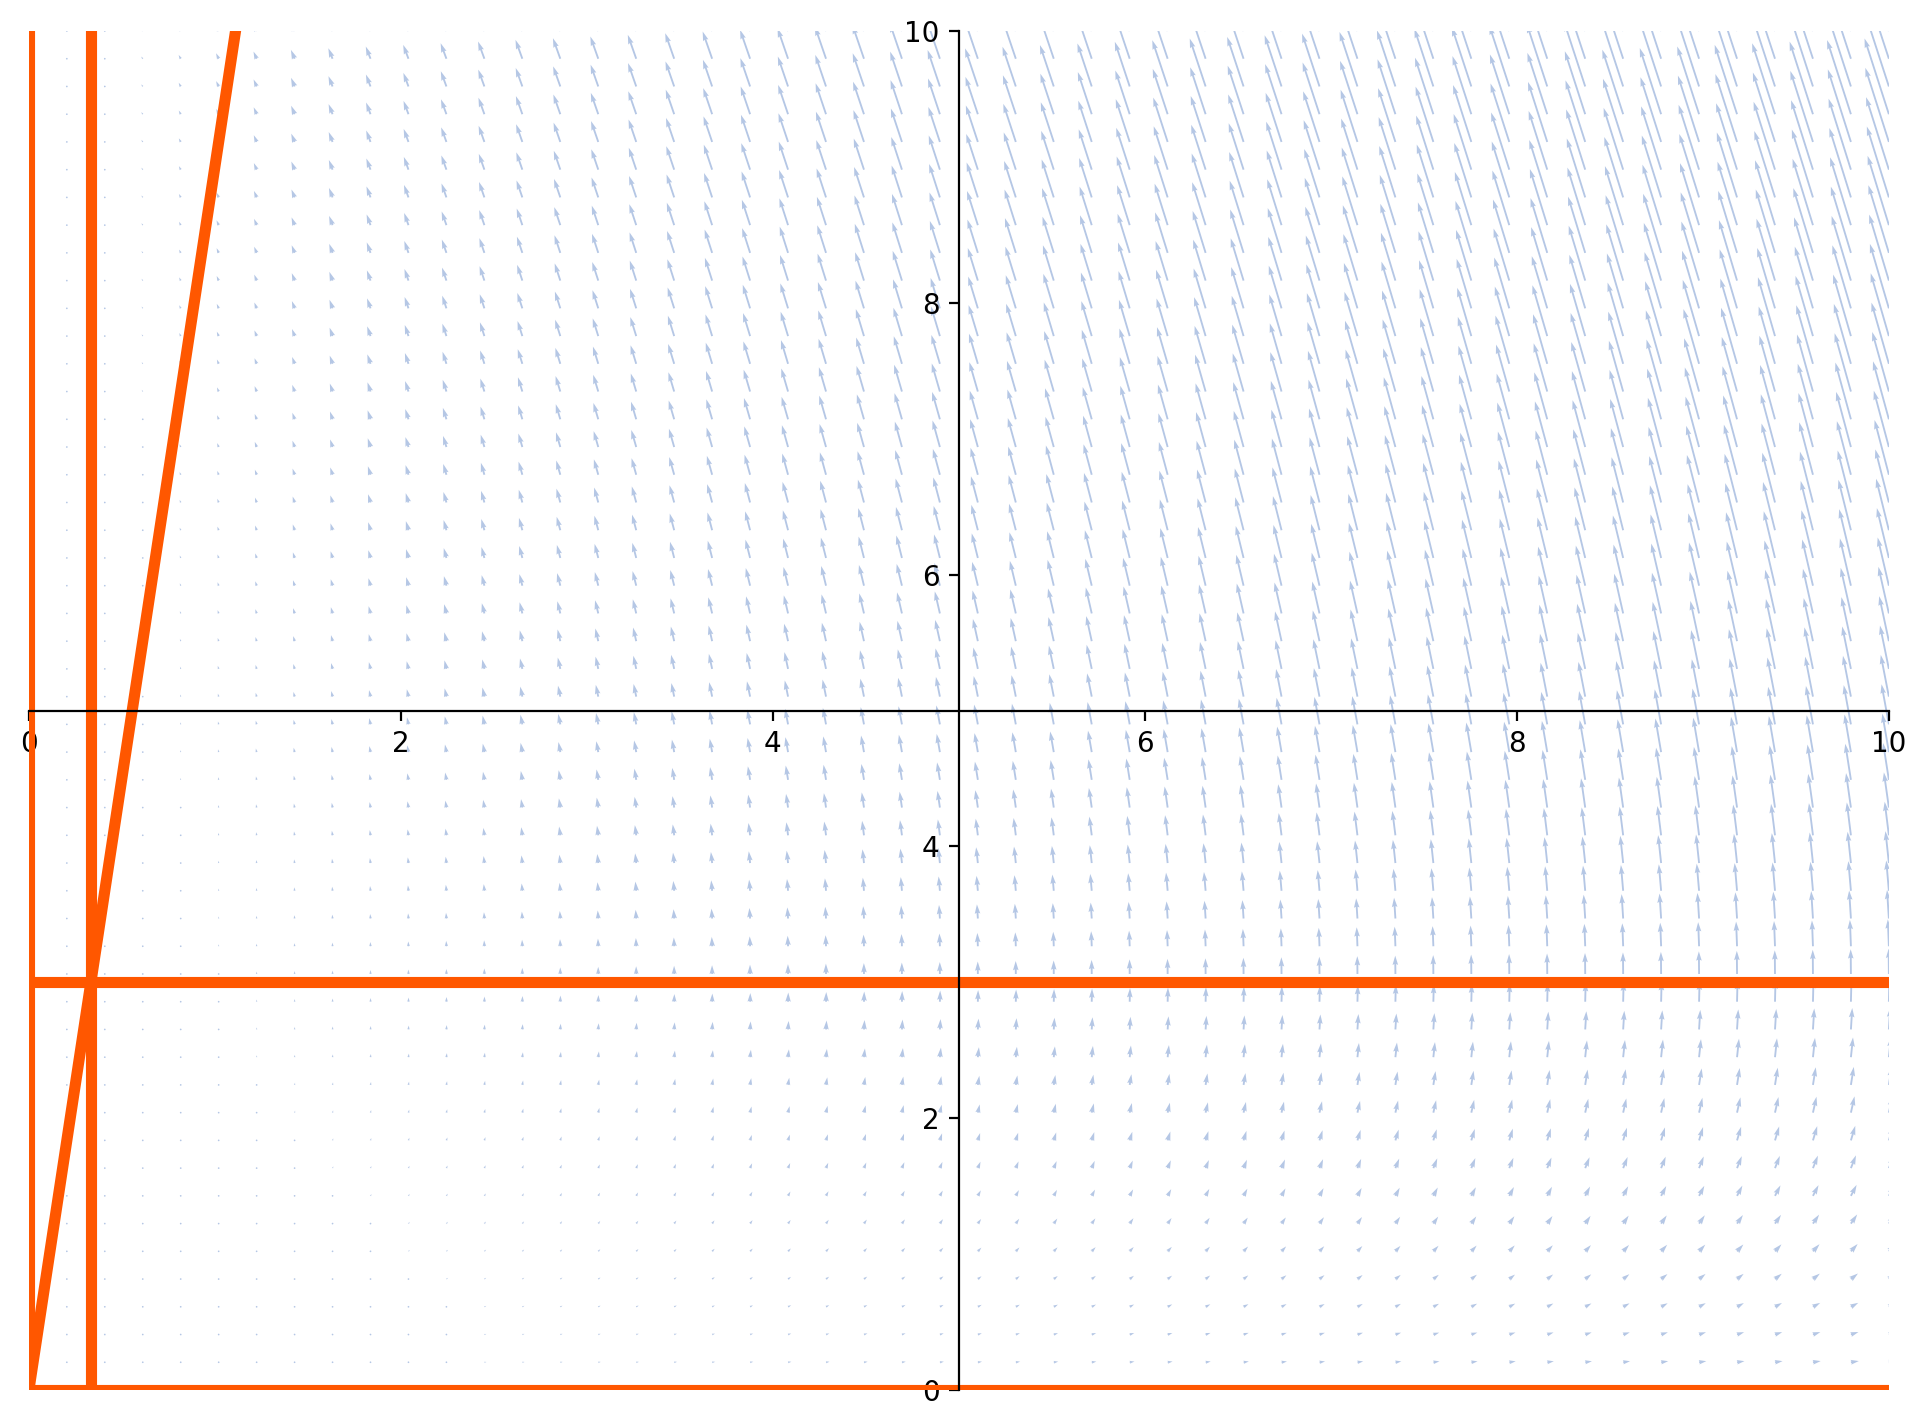

In [13]:
RANGE = np.linspace(0, 10, 5 * NUM_STEPS)
FINE_RANGE = np.linspace(0, 10, 100 * NUM_STEPS)
draw_the_vector_field(
    lambda x, y: 3 * x - x * y, lambda x, y: -y + 3 * x * y, RANGE, RANGE
)
# plot the line y=0
plt.plot(FINE_RANGE, np.zeros(len(FINE_RANGE)), "#FF5700", linewidth=4)
# plot the line x=0
plt.plot(np.zeros(len(FINE_RANGE)), FINE_RANGE, "#FF5700", linewidth=4)
# plot the line y=3
plt.plot(FINE_RANGE, np.full(len(FINE_RANGE), 3), "#FF5700", linewidth=4)
# plot the line x=1/3
plt.plot(np.full(len(FINE_RANGE), 1 / 3), FINE_RANGE, "#FF5700", linewidth=4)
# plot the line y=9x
plt.plot(FINE_RANGE, 9 * FINE_RANGE, "#FF5700", linewidth=4)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()


 Let's normalize the vector field to discern its direction around the equilibrium points.

(0, 1)

(0, 4)

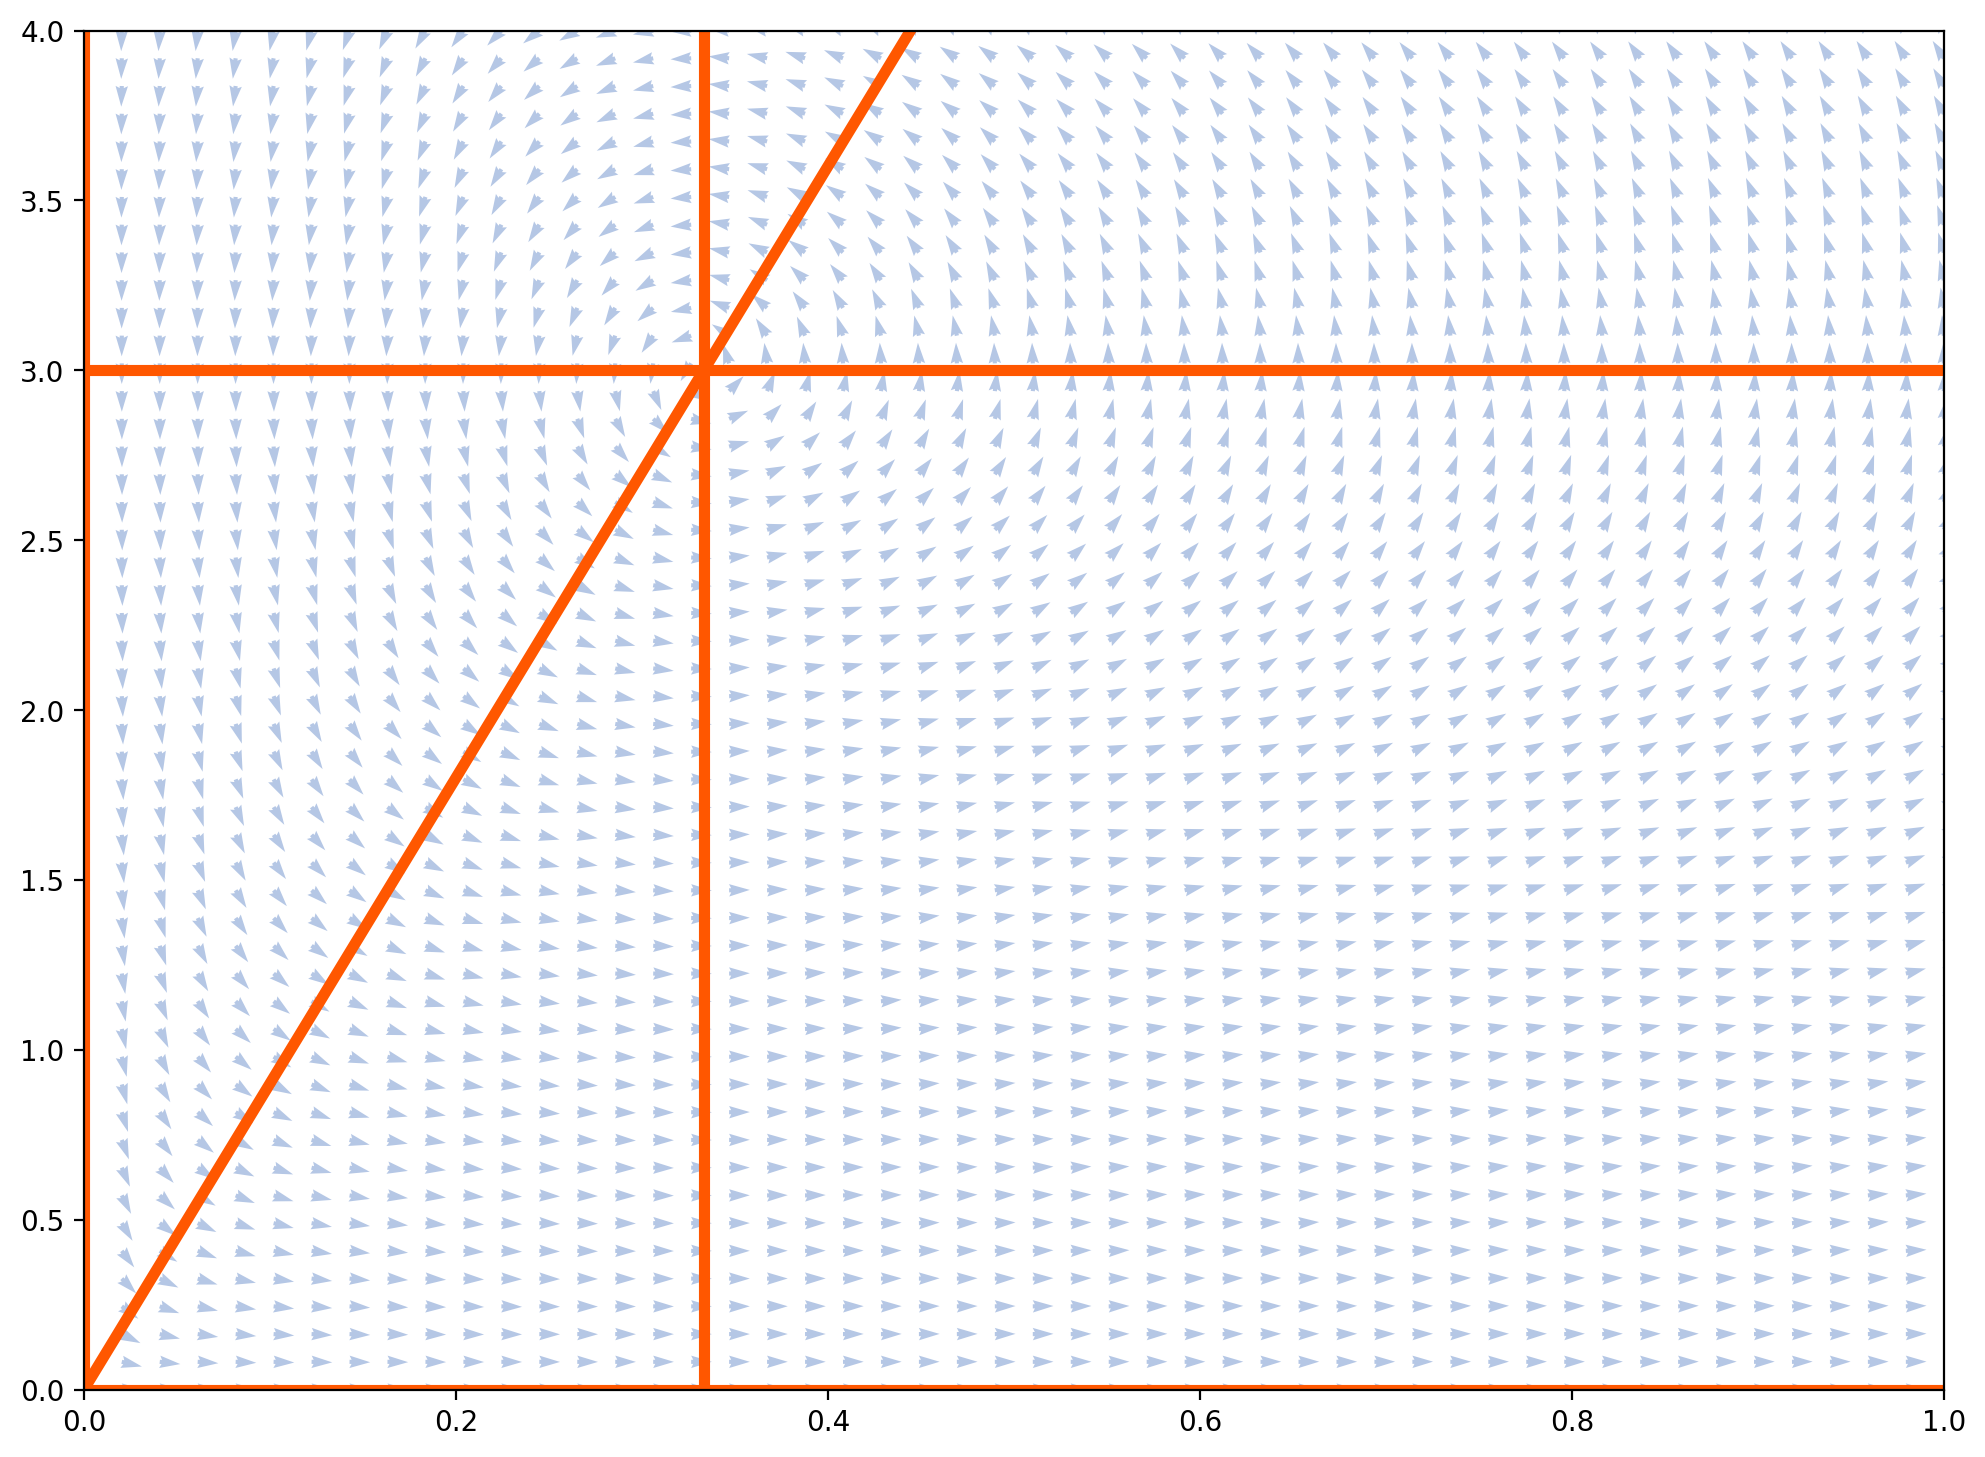

In [14]:
ARG_X = (0, 1)
ARG_Y = (0, 4)
X_RANGE = np.linspace(*ARG_X, 5 * NUM_STEPS)
Y_RANGE = np.linspace(*ARG_Y, 5 * NUM_STEPS)
FINE_RANGE = np.linspace(-1, 4, 10 * NUM_STEPS)
draw_the_vector_field(
    lambda x, y: 3 * x - x * y,
    lambda x, y: -y + 3 * x * y,
    X_RANGE,
    Y_RANGE,
    width=0.005,
    normalised=True,
    centered_axes=False,
)
# plot the line y=0
plt.plot(FINE_RANGE, np.zeros(len(FINE_RANGE)), "#FF5700", linewidth=4)
# plot the line x=0
plt.plot(np.zeros(len(FINE_RANGE)), FINE_RANGE, "#FF5700", linewidth=4)
# plot the line y=3
plt.plot(FINE_RANGE, np.full(len(FINE_RANGE), 3), "#FF5700", linewidth=4)
# plot the line x=1/3
plt.plot(np.full(len(FINE_RANGE), 1 / 3), FINE_RANGE, "#FF5700", linewidth=4)
# plot the line y=9x
plt.plot(FINE_RANGE, 9 * FINE_RANGE, "#FF5700", linewidth=4)
plt.xlim(*ARG_X)
plt.ylim(*ARG_Y)
plt.show()


 The differential equation, solving which we obtain the integral curves that coincide with the phase curves of the system of ordinary differential equations above, is as follows:
 $$
 \begin{align}
 \frac{dy}{dx} = \frac{-y + 3xy}{3x - xy}
 \end{align}
 $$
 Solving the differential equation, we obtain the following:
 $$
 \begin{align}
 \int\frac{(3-y)dy}{y}&=\int \frac{(3x-1)dx}{x}\\
 \Leftrightarrow 3 \log |y| -y  &= 3x  - \log|x| + C\\
 \Leftrightarrow \log|xy^3| &= 3x +  y + C\\
 \Leftrightarrow |xy^3| &= K\exp(3x +  y)
 \end{align}

 Therefore, we can represent the phase curves as $H(x, y) = F(x) + G(y)$, where $F(x) = -\log |x| + 3x$ and $G(y) = -3 \log|y| + y$.



 $\frac{\partial H(x,y)}{\partial x} = \frac{\partial F(x)}{\partial x} = -1/x + 3$, so $x^{*}=\frac{1}{3}$.

 $\frac{\partial H(x,y)}{\partial y} = \frac{\partial G(y)}{\partial y} = -3/y + 1$, so $y^{*}=3$.

 Now, consider $f(x) = H(x, y^*) = -\log|x| + 3x - 3\log 3 + 3$. Its graph is as follows:


(0, 15)

(0, 6)

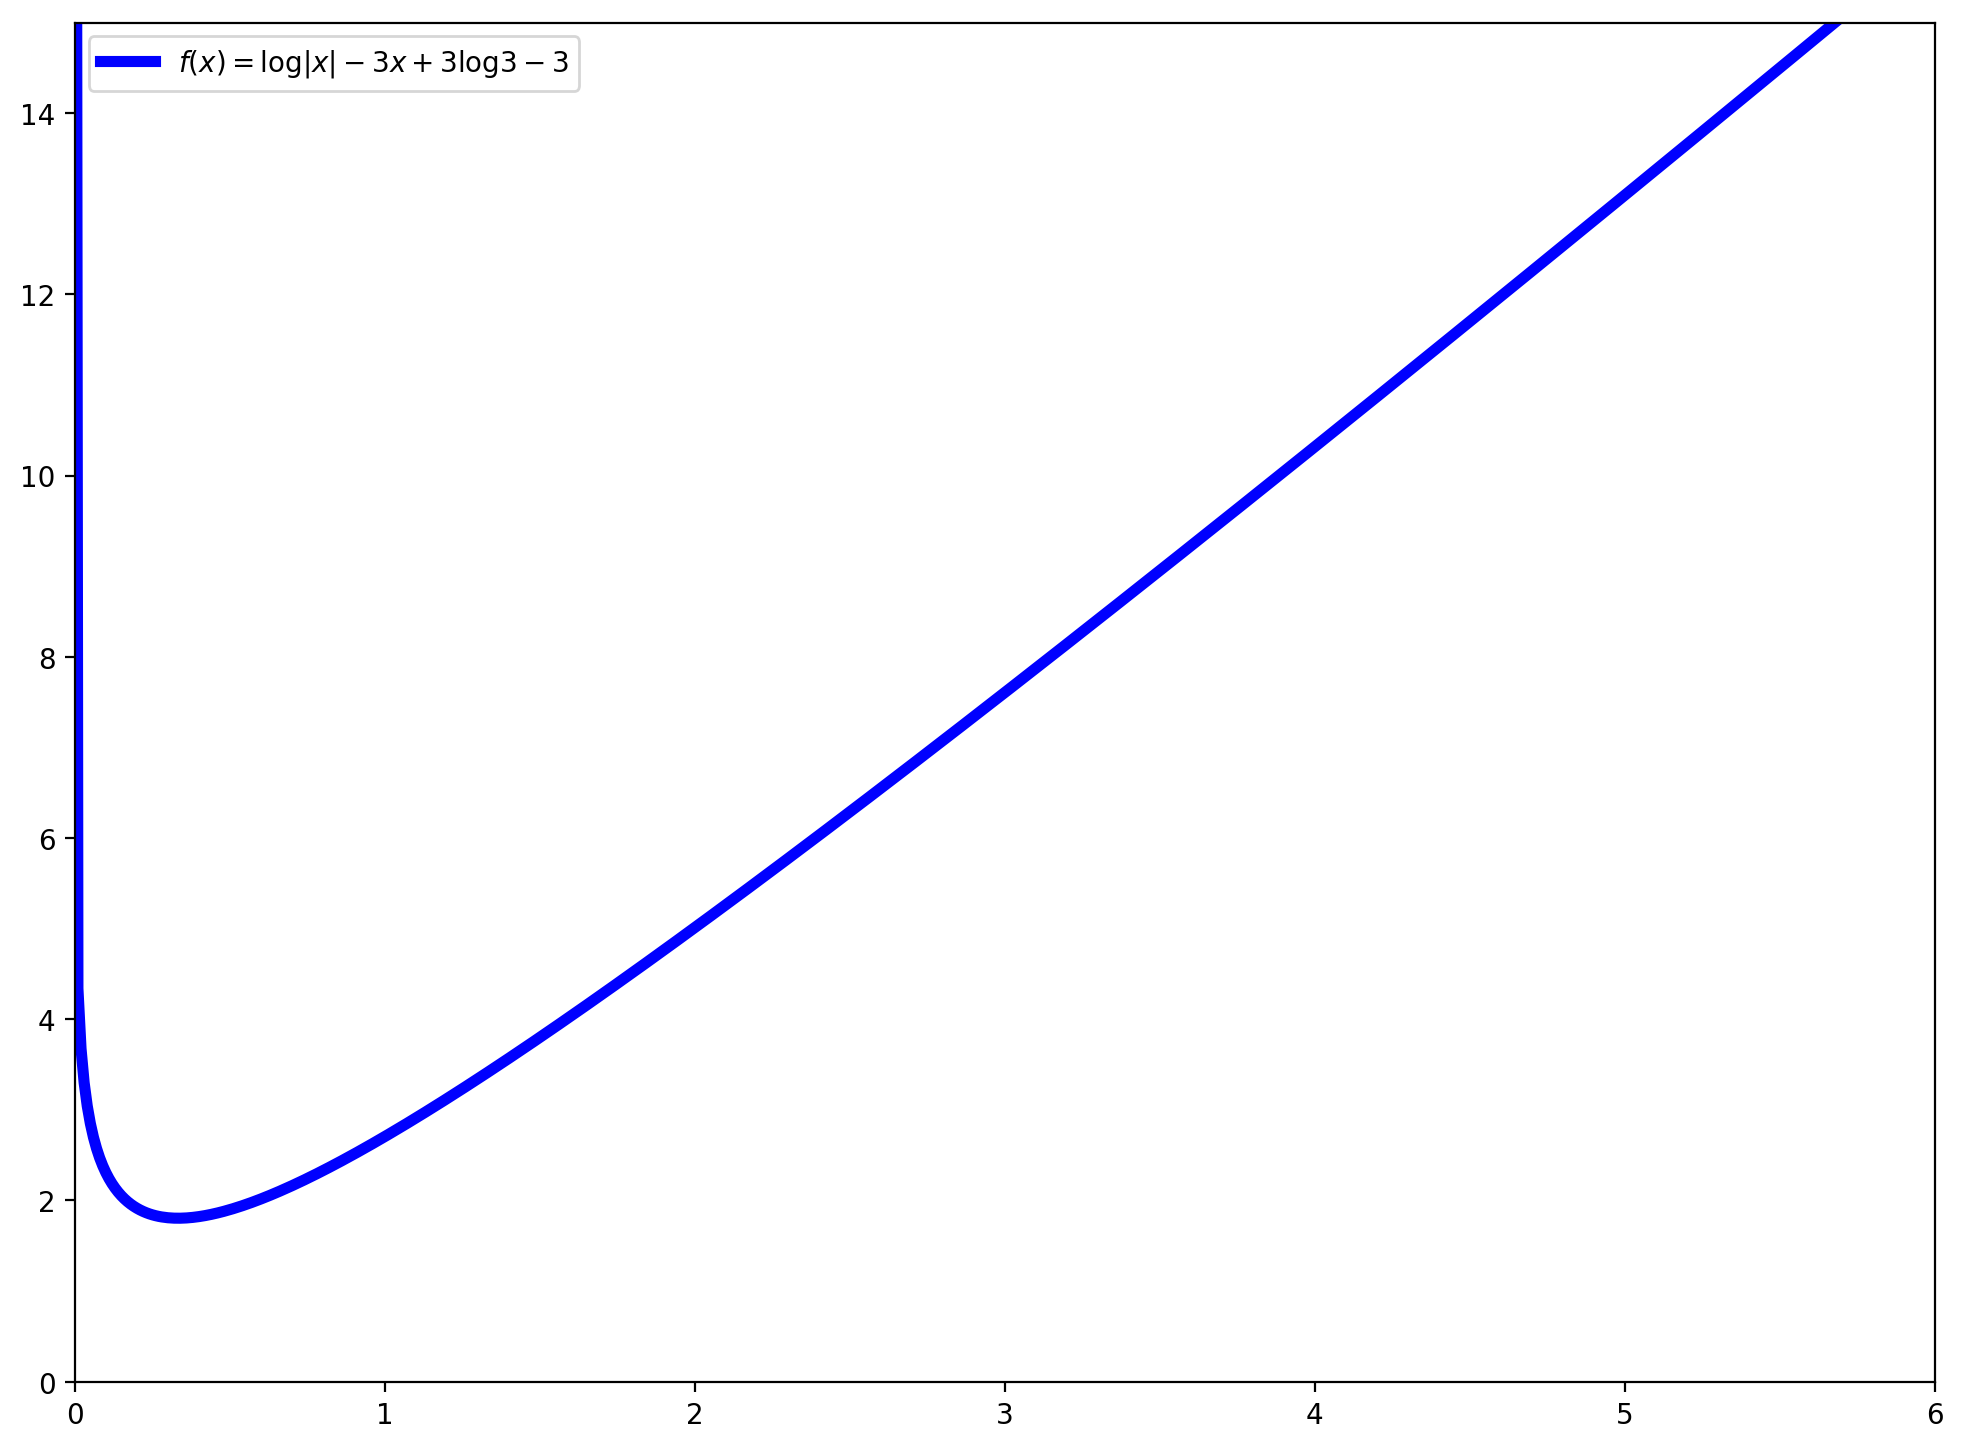

In [15]:
RANGE = np.linspace(0.00000000000001, 10, 100 * NUM_STEPS)
f_lambda = lambda x: -(log(abs(x)) - 3 * x + 3 * log(3) - 3)
draw_the_graph(RANGE, np.vectorize(f_lambda)(RANGE), centered_axes=False, color="b")
plt.ylim(0, 15)
plt.xlim(0, 6)
plt.legend(["$f(x) = \log|x| - 3x + 3\log 3 - 3$"])


 Now, consider $g(y) = H(x^*, y) = 3 \log|y| - y - \log 3 - 1$

(0, 15)

(0, 6)

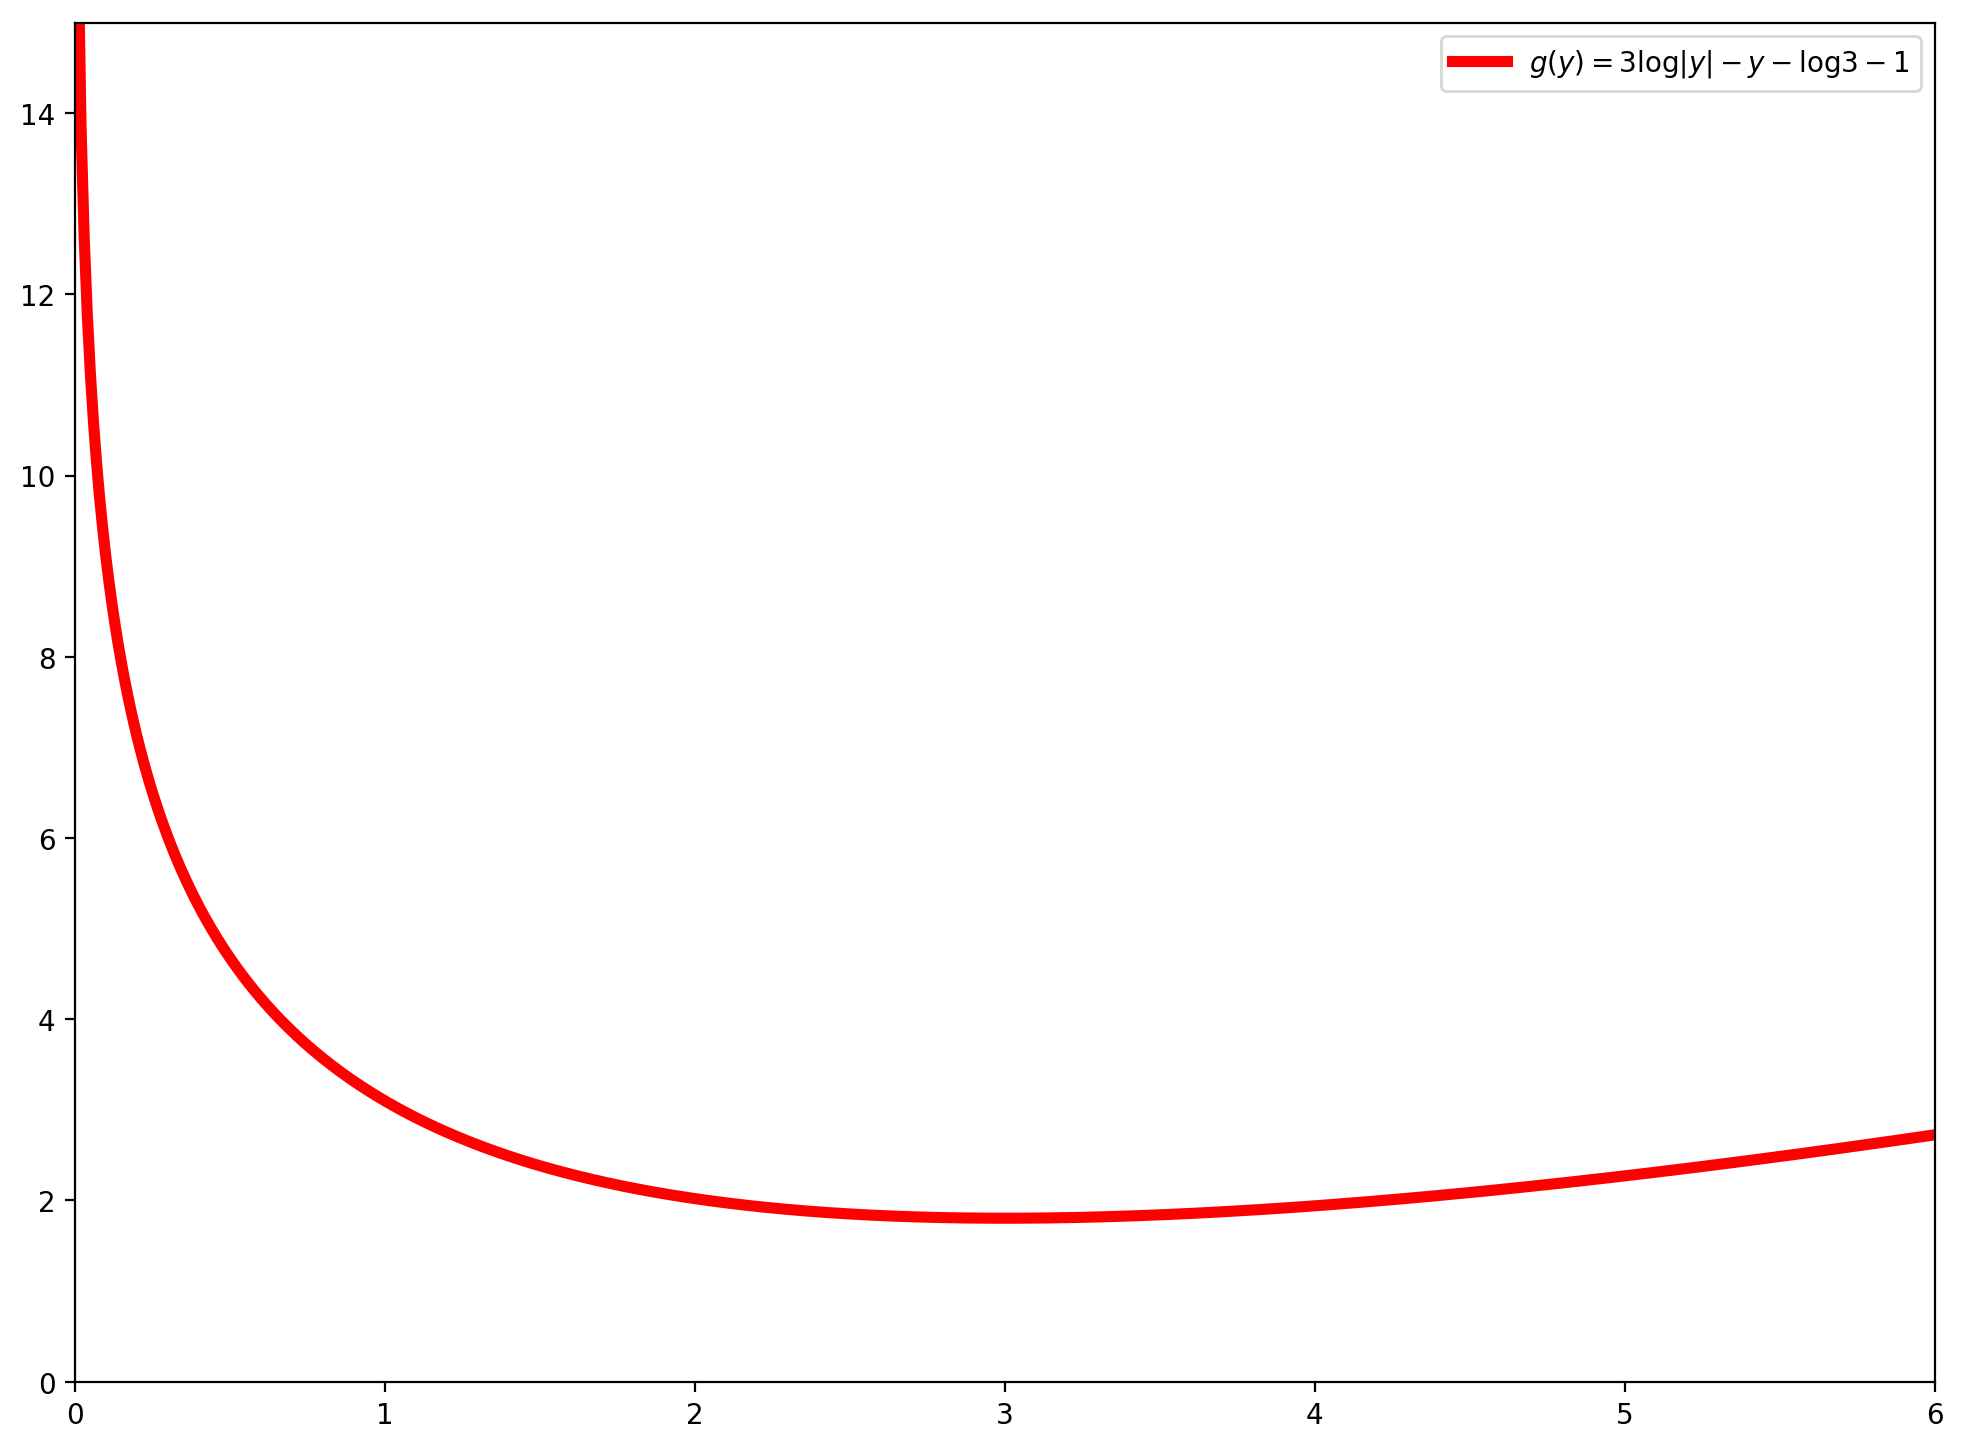

In [16]:
RANGE = np.linspace(0.00000000000001, 10, 100 * NUM_STEPS)
g_lambda = lambda y: -(3 * log(abs(y)) - y - log(3) - 1)
draw_the_graph(RANGE, np.vectorize(g_lambda)(RANGE), centered_axes=False, color="r")
plt.ylim(0, 15)
plt.xlim(0, 6)
plt.legend(["$g(y) = 3 \log|y| - y - \log 3 - 1$"])


 The phase curve is given by  $H(x,y) = 3x + y - \log|xy^3|$,
  and its value at the equilibrium point is
  $H(\frac{1}{3}, 3) = 1 + 3 - \log 9 = 2$.

<Figure size 864x648 with 0 Axes>

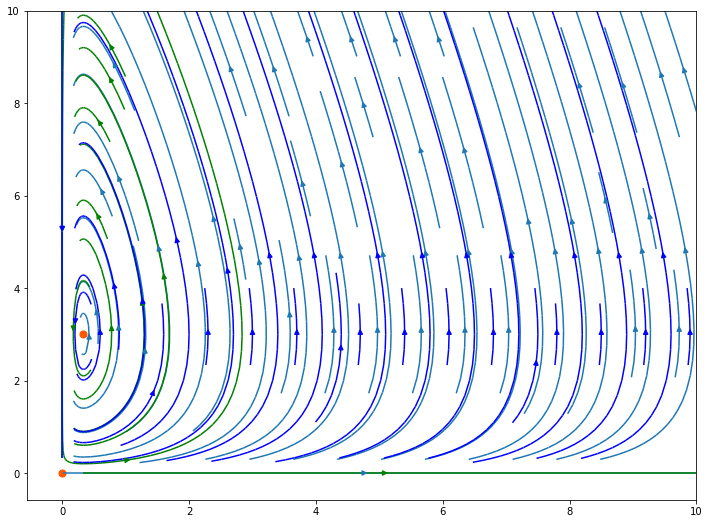

In [17]:
radius = 10
Y, X = np.mgrid[0:radius:5000j, 0:radius:1000j]
RANGE = np.linspace(0, radius, 100 * NUM_STEPS)
start_range = np.arange(0, radius, .1)
x_fixed = list(zip([1 / 3] * len(start_range), start_range))
y_fixed = list(zip(start_range, [3] * len(start_range)))
U = 3 * X - np.multiply(X, Y)
V = -Y + 3 * np.multiply(X, Y)
plt.figure(figsize=FIGURE_SIZE)
plt.streamplot(X, Y, U, V)
plt.scatter([0, 1 / 3], [0, 3], s=50, color="#ff5700")
plt.streamplot(X, Y, U, V, start_points=x_fixed, color="g")
plt.streamplot(X, Y, U, V, start_points=y_fixed, color="b")


 The points (0, 0) and $(3, \frac{1}{3})$ are periodic, as are the elliptic phase curves around the second fixed point.
 The open ray y=0 is also a solution (for $x > 0$), which is non-periodic and unbounded.
 Now, the reverse-oriented ray x=0 (for y > 0) is a non-periodic solution which tends to zero over time.


 # Problem 4
 ## a
 Consider the following:
 $$
 \begin{align}
 \dot{y} &= \frac{5 x^4 \sin(x^5) \sin(y^2)}{2 y \cos(x^5) \cos(y^2)}\\
 \Leftrightarrow \dot{y} &= \frac{5x^4}{2y}\tan(x^5) \tan(y^2)\\
 \Leftrightarrow \int\frac{2y dy}{\tan(y^2)} &= \int5x^4 \tan(x^5) dx\\
 \Leftrightarrow \log \sin(y^2) &= \log \sec(x^5) + C
 \end{align}
 $$.
 ## b
 Consider the following system of differential equations:
 $$
 \begin{align}
 \dot{x} &= 4x(x^2 + 2 xy + 3 y^2)\\
 \dot{y} &= x^3 + 4y(x^2 + 2 xy + 3 y^2)
 \end{align}
 $$
 Note that $\frac{dy}{dx} = \frac{4}{1 + 2 \frac{y}{x} + 3 (\frac{y}{x})^2} + \frac{y}{x}$

 Take $z = \frac{y}{x}$.

 Then $\frac{dz}{dx} = -\frac{y}{x^2} + \frac{dy}{dx}\frac{1}{x} = \frac{1}{x}(-z + \frac{dy}{dx})$.

 On the other hand, $\frac{dy}{dx} = z + \frac{4}{1 + 2z + 3z^2}$.

 Hence,
 $$
 \begin{align}
 \frac{dz}{dx} &= \frac{1}{x} \frac{4}{1 + 2z + 3z^2}\\
 \Leftrightarrow \int (1 + 2z + 3z^2)dz &= \int 4\frac{dx}{x}\\
 \Leftrightarrow z + z^2 + z^3 &= 4\log|x| + C \\
 \Leftrightarrow y^3+y^2x+yx^3 &= 4x^3\log|x| + Cx^3
 \end{align}
 $$
 for $x \neq 0$.
 If $x=0$, then $y=k$ for real $k$ is also a solution.
 ## c
 Consider the equation $dx(5x^4 \cos (x^5) \cos (y^5)) + dy (-5y^4 \sin (x^5) \sin (y^5)) = 0$.
 If $y$ are not equal to $\sqrt{\pi  n}$ for any $n\in \mathbb{Z}$, then after rearrangement we obtain the following equation:
 $$
 \begin{align}
 \frac{dy}{dx} = (\frac{x}{y})^4 \cot(x^5) \cot(y^5),
 \end{align}
 $$
 which is separable, and thus:
 $$
 \begin{align}
 \int (5y^4 \tan (y^5)) dy &= \int (5x^4 \cot(x^5) ) dx\\
 \Leftrightarrow \log \sec(y^5) &= \log \sin(x^5) + C
 \end{align}
 $$
 If $x$ is equal to $\sqrt{\pi  n}$ for some $n\in \mathbb{Z}$, then any $y$ satisfies the equation, so we obtain a vertical line of solutions.
 If $y$ is equal to $\sqrt{\pi  n}$ for some $n\in \mathbb{Z}$, then we obtain the equation $dx(5x^4\cos(x^5)) = 0$, and so $\sin(x^5) = C$ for some $C \in \mathbb{R}\cap [-1, 1]$ which corresponds to infinitely many points determined by the initial conditions.
 ## d
 Consider the following equation:
 $$
 \begin{align}
  y' &= (-5x^4 + \sin(x))y + (6x^2 + \exp(x))\exp(-(x^5 + \cos(x)))
 \end{align}
 $$
 Let's solve the homogenous variant of the equation above first, assuming that $y \neq 0$:
 $$
 \begin{align}
  y' &= (-5x^4 + \sin(x))y \\
 \Leftrightarrow \int\frac{dy}{y} &= \int (-5x^4 + \sin(x)) dx\\
 \Leftrightarrow \log y &= -x^5 - \cos(x) + C\\
 \implies y &= C(x) \exp(-(x^5 + \cos(x)))
 \end{align}
 $$
 Now,
 $$
 \begin{align}
 C(x) &= \int \frac{(6x^2 + \exp(x))\exp(-(x^5 + \cos(x))}{\exp(-(x^5 + \cos(x)))}dx\\
 C(x) &= \int (6x^2 + \exp(x))dx\\
 C(x) &= 2x^3 + \exp(x) + C,
 \end{align}
 $$
 and so $y = (2x^3 + \exp(x) + C) \exp(-(x^5 + \cos(x))), C\in \mathbb{R}$.
 If $y=0$, then $(6x^2 + \exp(x))\exp(-(x^5 + \cos(x))) = 0$, which holds for sufficiently big $x$.

 ## e
  Consider the following equation:
 $$
 \begin{align}
 -dx(x^3 -2x^2y - 2xy^2 - 15y^3) + dy (-2x^3 -2x^2y-15xy^2) &= 0\\
 dy (-x(2x^2 + 2xy + 15y^2)) &= dx(x^3 -y(2x^2 + 2xy + 15y^2))\\
 \end{align}
 $$
 If $x \neq 0$, we obtain:
 $$
 \begin{align}
 \frac{dy}{dx} &= \frac{x^3 -y(2x^2 + 2xy + 15y^2)}{-x(2x^2 + 2xy + 15y^2)}\\
 &= -\frac{1}{2 + 2\frac{y}{x}+ 15 (\frac{y}{x})^2} + \frac{y}{x}
 \end{align}
 $$
 Take $z = \frac{y}{x}$.

 Then $\frac{dz}{dx} = -\frac{y}{x^2} + \frac{dy}{dx}\frac{1}{x} = \frac{1}{x}(-z + \frac{dy}{dx})$.

 On the other hand, $\frac{dy}{dx} = z - \frac{1}{2 + 2z + 15z^2}$.
 Hence,
 $$
 \begin{align}
 x\frac{dz}{dx} &= - \frac{1}{2 + 2z + 15z^2}\\
 \Leftrightarrow \int (2 + 2z + 15z^2)dz &=  \int - \frac{dx}{x}\\
 \Leftrightarrow 2z + z^2 + 5z^3 + C&=  -\log |x|\\
 \Leftrightarrow 2x^2y + xy^2 + 5y^3 + Cx^3 &=  -x^3\log |x| \\
 \Leftrightarrow x^3\log |x| + Cx^3 + 2x^2y + xy^2 + 5y^3 &= 0
 \end{align}
 $$


 # Problem 5


In [18]:

# Adapted from https://fiftyexamples.readthedocs.io/en/latest/gravity.html

from math import sqrt, log, atan2, cos, sin
import turtle

# Constants
G = 6.67408e-11
EARTH_RADIUS = 6.371 * 10 ** 6
EARTH_MASS = 5.9742 * (10 ** 24)
AU = 149.6e9


class Halo(turtle.Turtle):
    def __init__(self):
        turtle.Turtle.__init__(self, shape="circle")

    def drawCircle(self, x, y, radius=50):
        self.turtlesize(1 / 1000, 1 / 1000, 1 / 1000)
        self.penup()
        self.setposition(x, y)
        self.pendown()
        self.circle(radius)


class Body(turtle.Turtle):
    name = "Body"
    mass = None
    velocity_x = 0.0
    velocity_y = 0.0
    position_x = 0.0
    position_y = 0.0
    radius = 1
    fixed = False

    def attraction(self, other):
        if self is other:
            raise ValueError(
                f"The force of attraction to itself is undefined, aborting."
            )
        current_x, current_y = self.position_x, self.position_y
        other_x, other_y = other.position_x, other.position_y
        dx = other_x - current_x
        dy = other_y - current_y
        distance = sqrt(dx ** 2 + dy ** 2)

        if not distance:
            raise ValueError(f"Bodies {self.name} and  {other.name} collide.")

        force = G * self.mass * other.mass / (distance ** 2)

        theta = atan2(dy, dx)
        force_x = cos(theta) * force
        force_y = sin(theta) * force
        return force_x, force_y


def print_stats(current_time, bodies):
    for body in bodies:
        print(f"Time: {current_time}")
        print(f"Body: {body.name}")
        print(f"Current position: {body.position_x} {body.position_y}")
        print(f"Current velocity: {body.velocity_x:.2f} {body.velocity_y:.2f}\n")


def model(bodies, time_period, timestep=1, scale=1, verbose=False):
    for body in bodies:
        body.penup()
        body.hideturtle()

    current_time = 0
    while current_time < time_period:
        if verbose:
            print_stats(current_time, bodies)
        current_time += timestep

        force = {}
        for body in bodies:
            total_force_x = 0.0
            total_force_y = 0.0
            for other in bodies:
                if body is other:
                    continue
                force_x, force_y = body.attraction(other)
                total_force_x += force_x
                total_force_y += force_y

            force[body] = (total_force_x, total_force_y)

        for body in bodies:
            if not body.fixed:
                force_x, force_y = force[body]
                body.velocity_x += force_x / body.mass * timestep
                body.velocity_y += force_y / body.mass * timestep

                # Update positions
                body.position_x += body.velocity_x * timestep
                body.position_y += body.velocity_y * timestep
            body.goto(body.position_x * scale, body.position_y * scale)
            body.dot(2 * body.radius)



In [0]:
def run_model(satellite_velocity, color, time_period=10000):
    scale = 10e5 / AU

    earth = Body()
    earth.name = "Earth"
    earth.mass = EARTH_MASS
    earth.pencolor("#33cfcc")

    earth.radius = 1

    satellite = Body()
    satellite.name = f"Satellite {satellite_velocity}"
    satellite.mass = 1
    satellite.radius = 1
    satellite.position_y = EARTH_RADIUS
    satellite.velocity_x = satellite_velocity
    satellite.pencolor(color)

    halo = Halo()
    halo.drawCircle(0, -EARTH_RADIUS * scale, EARTH_RADIUS * scale)

    model([earth, satellite], time_period, scale=scale)


window = turtle.Screen()
window.setup(width=300, height=300)
window.tracer(False)

run_model(5000, color="#7fc97f")
run_model(9000, color="#beaed4")
run_model(12000, color="#fdc086")

window.getcanvas().postscript(file="single_planet_model.ps")
window.bye()


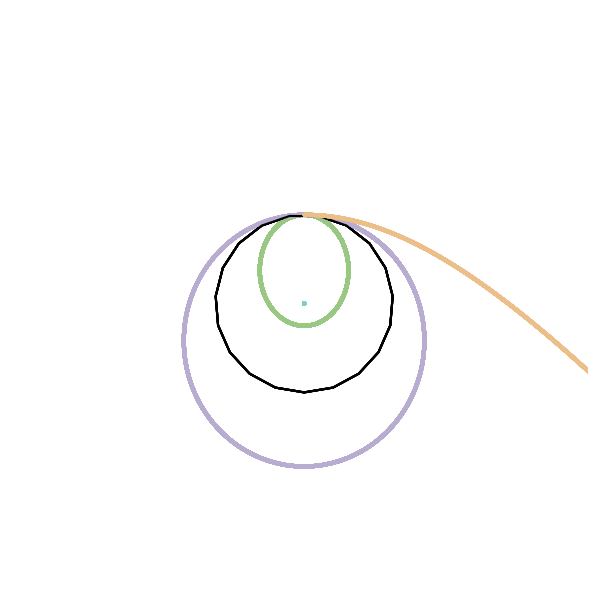

In [21]:
import IPython
IPython.display.Image("satellite.png")

 ## b

In [22]:
window = turtle.Screen()
window.setup(width=300, height=300)
window.tracer(0, 0)


def find_the_first_cosmic():
    scale = 10e5 / AU
    earth = Body()
    earth.name = "Earth"
    earth.mass = EARTH_MASS
    earth.fixed = True

    time_period = 24 * 3600
    increment = 0.01
    initial_position = (0, EARTH_RADIUS)
    velocity = 5
    satellite = Body()
    satellite.mass = 1
    satellite.radius = 1
    while True:
        velocity += increment
        satellite.position_x, satellite.position_y = initial_position
        satellite.velocity_x = velocity
        model([earth, satellite], time_period, scale=scale, timestep=3600)
        error = abs(
            sqrt(satellite.position_x ** 2 + (satellite.position_y - EARTH_RADIUS) ** 2)
        )
        if error < 10 * increment:
            break
    return velocity



 Albeit untested due to the lack of time, this function should  not stray too far from 7.91.

 ## c

In [0]:
def launch_satellite(velocity, color, angle=pi / 4):
    satellite = Body()
    satellite.name = f"Satellite {velocity}"
    satellite.mass = 1
    satellite.radius = 1 / 2
    satellite.velocity_x = velocity * cos(angle)
    satellite.velocity_y = velocity * sin(angle)
    satellite.pencolor(color)
    return satellite


def run_binary_model(
    satellite_velocity,
    color,
    time_period=20000,
    timestep=1,
    scale=5 * 10e4 / AU,
    verbose=False,
):
    aleph = Body()
    aleph.name = "Aleph"
    aleph.position_x = -2 * 10e6
    aleph.mass = EARTH_MASS
    aleph.pencolor("#004400")
    aleph.radius = 3
    aleph.fixed = True

    beth = Body()
    beth.name = "Beth"
    beth.position_x = 2 * 10e6
    beth.mass = EARTH_MASS
    beth.pencolor("#007700")
    beth.radius = 3
    beth.fixed = True

    model(
        [aleph, beth, launch_satellite(satellite_velocity, color)],
        time_period,
        scale=scale,
        timestep=timestep,
        verbose=verbose,
    )


window = turtle.Screen()
window.setup(width=300, height=300)
window.tracer(False)

velocities = np.arange(1, 5.5, 0.5)
colours = [
    "#a50026",
    "#d73027",
    "#f46d43",
    "#fdae61",
    "#abd9e9",
    "#74add1",
    "#4575b4",
    "#542788",
    "#313695",
]

for idx in range(len(velocities)):
    run_binary_model(
        velocities[idx] * 1000, colours[idx], time_period=20000, timestep=1
    )

window.getcanvas().postscript(file="binary_model.ps")
window.bye()



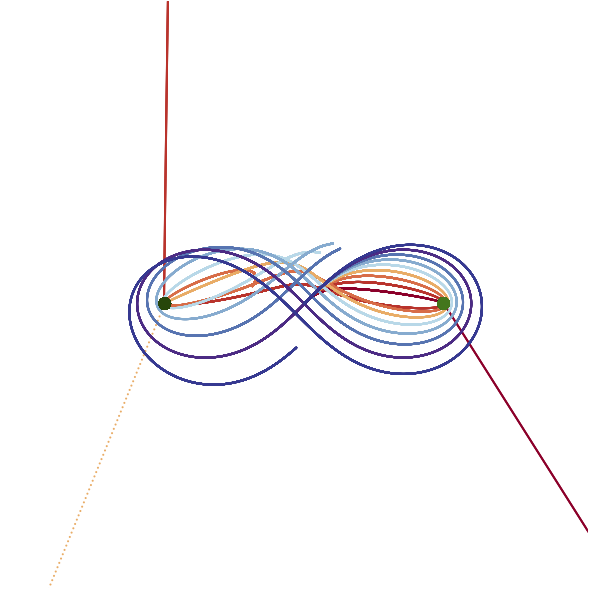

In [23]:
import IPython
IPython.display.Image("binary_model.png")
